In [1]:
import matplotlib.pyplot as plt
import numpy as np

import bussilab
from bussilab import ann
import scipy
from scipy.optimize import minimize
%matplotlib notebook

In [2]:
#initalizing matrices: In our representations, vector L is [DeQ1, DeQ1**2, DeQ2, DeQ2**2,....,DeQ5**2, DeQ1*DeQ2, DeQ1*DeQ3,.... , DeQ4*DeQ5]

DeQ=[0.3, 0.0, 0.1, 0.2, -0.2]
DeLDeQ=[[1, 2*DeQ[0], 0 ,0, 0, 0, 0, 0, 0, 0, DeQ[1], DeQ[2], DeQ[3], DeQ[4], 0, 0, 0, 0, 0, 0],
       [ 0, 0, 1, 2*DeQ[1], 0, 0, 0, 0, 0, 0, DeQ[0], 0, 0, 0, DeQ[2], DeQ[3], DeQ[4], 0, 0, 0],
       [ 0, 0, 0, 0, 1, 2*DeQ[2], 0, 0, 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, 0, DeQ[3], DeQ[4], 0],
       [ 0, 0, 0, 0, 0, 0, 1, 2*DeQ[3], 0, 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, DeQ[2], 0, DeQ[4]],
       [ 0, 0, 0, 0, 0, 0, 0, 0, 1, 2*DeQ[4], 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, DeQ[2], DeQ[3]]]

Loading WHAM output for each AFEC computation:   
\
W0: weights;  
logZ: log of partition functions;  
dE: energy differences between lambda 0 and lambda 1;  
Tr: Transformation Matrix for recomputing energies for any DeQ;  
eta6: angles values for torsional eta6;
eta6b: angles values for torsional eta6 for m6A in the second chain, in system cases where double methylation occurs

In [3]:
W0=[]
app=np.load("AFEC/m6a_anti/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("AFEC/m6a_syn/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("AFEC/Hurst_helix/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("AFEC/Single_strand_Hurst/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("AFEC/entry9_roost_anti/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("AFEC/ss_entry9/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("AFEC/ACGC/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("AFEC/ss_ACGC/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("AFEC/GCGA_duplex/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("AFEC/ss_GCGA/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("Kierzek_AFEC/Aduri_GUC6/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("Kierzek_AFEC/Aduri_ss_GUC6/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("Kierzek_AFEC/Aduri_ACU6/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("Kierzek_AFEC/Aduri_ss_ACU6/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("Kierzek_AFEC/Aduri_AGUU6/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("Kierzek_AFEC/Aduri_ss_AGUU6/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("Kierzek_AFEC/Aduri_CGGUG/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("Kierzek_AFEC/Aduri_ss_CGGC/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("Kierzek_AFEC/Aduri_ACUUA6GU/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("Kierzek_AFEC/Aduri_ss_ACUUA6GU/ReplicaEx/logW.npy")
W0.append(np.exp(app))

In [4]:
logZ=[]
app=np.load("AFEC/m6a_anti/ReplicaEx/logZ.npy")
logZ.append(app)
app=np.load("AFEC/m6a_syn/ReplicaEx/logZ.npy")
logZ.append(app)
app=np.load("AFEC/Hurst_helix/ReplicaEx/logZ.npy")
logZ.append(app)
app=np.load("AFEC/Single_strand_Hurst/ReplicaEx/logZ.npy")
logZ.append(app)
app=np.load("AFEC/entry9_roost_anti/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("AFEC/ss_entry9/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("AFEC/ACGC/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("AFEC/ss_ACGC/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("AFEC/GCGA_duplex/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("AFEC/ss_GCGA/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("Kierzek_AFEC/Aduri_GUC6/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_GUC6/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("Kierzek_AFEC/Aduri_ACU6/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_ACU6/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("Kierzek_AFEC/Aduri_AGUU6/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_AGUU6/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("Kierzek_AFEC/Aduri_CGGUG/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_CGGC/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("Kierzek_AFEC/Aduri_ACUUA6GU/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_ACUUA6GU/ReplicaEx/logZ.npy")
logZ.append((app))

In [5]:
dE=[]
app=np.load("AFEC/m6a_anti/ReplicaEx/DeE.npy")
dE.append(app)
app=np.load("AFEC/m6a_syn/ReplicaEx/DeE.npy")
dE.append(app)
app=np.load("AFEC/Hurst_helix/ReplicaEx/DeE.npy")
dE.append(app)
app=np.load("AFEC/Single_strand_Hurst/ReplicaEx/DeE.npy")
dE.append(app)
app=np.load("AFEC/entry9_roost_anti/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("AFEC/ss_entry9/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("AFEC/ACGC/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("AFEC/ss_ACGC/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("AFEC/GCGA_duplex/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("AFEC/ss_GCGA/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("Kierzek_AFEC/Aduri_GUC6/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_GUC6/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("Kierzek_AFEC/Aduri_ACU6/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_ACU6/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("Kierzek_AFEC/Aduri_AGUU6/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_AGUU6/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("Kierzek_AFEC/Aduri_CGGUG/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_CGGC/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("Kierzek_AFEC/Aduri_ACUUA6GU/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_ACUUA6GU/ReplicaEx/DeE.npy")
dE.append((app))

In [6]:
Tr=[]
app=np.load("AFEC/m6a_anti/Trans_vectors.npy")
Tr.append(app)
app=np.load("AFEC/m6a_syn/Trans_vectors.npy")
Tr.append(app)
app=np.load("AFEC/Hurst_helix/Trans_vectors.npy")
Tr.append(app)
app=np.load("AFEC/Single_strand_Hurst/Trans_vectors.npy")
Tr.append(app)
app=np.load("AFEC/entry9_roost_anti/Trans_vectors.npy")
Tr.append((app))
app=np.load("AFEC/ss_entry9/Trans_vectors.npy")
Tr.append((app))
app=np.load("AFEC/ACGC/Trans_vectors.npy")
Tr.append((app))
app=np.load("AFEC/ss_ACGC/Trans_vectors.npy")
Tr.append((app))
app=np.load("AFEC/GCGA_duplex/Trans_vectors.npy")
Tr.append((app))
app=np.load("AFEC/ss_GCGA/Trans_vectors.npy")
Tr.append((app))
app=np.load("Kierzek_AFEC/Aduri_GUC6/Trans_vectors.npy")
Tr.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_GUC6/Trans_vectors.npy")
Tr.append((app))
app=np.load("Kierzek_AFEC/Aduri_ACU6/Trans_vectors.npy")
Tr.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_ACU6/Trans_vectors.npy")
Tr.append((app))
app=np.load("Kierzek_AFEC/Aduri_AGUU6/Trans_vectors.npy")
Tr.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_AGUU6/Trans_vectors.npy")
Tr.append((app))
app=np.load("Kierzek_AFEC/Aduri_CGGUG/Trans_vectors.npy")
Tr.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_CGGC/Trans_vectors.npy")
Tr.append((app))
app=np.load("Kierzek_AFEC/Aduri_ACUUA6GU/Trans_vectors.npy")
Tr.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_ACUUA6GU/Trans_vectors.npy")
Tr.append((app))

In [7]:
eta6=[]
eta6b=[]
app=np.loadtxt("AFEC/m6a_anti/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("AFEC/m6a_syn/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("AFEC/Hurst_helix/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("AFEC/Single_strand_Hurst/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("AFEC/entry9_roost_anti/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("AFEC/ss_entry9/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("AFEC/ACGC/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("AFEC/ss_ACGC/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("AFEC/GCGA_duplex/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("AFEC/ss_GCGA/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("Kierzek_AFEC/Aduri_GUC6/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("Kierzek_AFEC/Aduri_ss_GUC6/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("Kierzek_AFEC/Aduri_ACU6/COLVAR")
eta6.append(app[:,1])
eta6b.append(app[:,2])
app=np.loadtxt("Kierzek_AFEC/Aduri_ss_ACU6/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("Kierzek_AFEC/Aduri_AGUU6/COLVAR")
eta6.append(app[:,1])
eta6b.append(app[:,2])
app=np.loadtxt("Kierzek_AFEC/Aduri_ss_AGUU6/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("Kierzek_AFEC/Aduri_CGGUG/COLVAR")
eta6.append(app[:,1])
eta6b.append(app[:,2])
app=np.loadtxt("Kierzek_AFEC/Aduri_ss_CGGC/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("Kierzek_AFEC/Aduri_ACUUA6GU/COLVAR")
eta6.append(app[:,1])
eta6b.append(app[:,2])
app=np.loadtxt("Kierzek_AFEC/Aduri_ss_ACUUA6GU/COLVAR")
eta6.append(app[:,1])


dEtot=np.array(dE)
W0tot=np.array(W0)
Trtot=np.array(Tr)
eta6=np.array(eta6)
eta6b=np.array(eta6b)
W0=W0tot
dE=dEtot
Tr=Trtot

In [8]:
#Since some alchemical simulations were performed also by switching on the torsional term eta6, we correct the the energies differences for those contribution


import math
for i in range(10):
    dE[10+i]-=np.multiply([np.cos(eta6[10+i]-math.pi)+1],2.5).reshape(-1)
    
dE[12]-=np.multiply([np.cos(eta6b[0]-math.pi)+1],2.5).reshape(-1)
dE[14]-=np.multiply([np.cos(eta6b[1]-math.pi)+1],2.5).reshape(-1)
dE[16]-=np.multiply([np.cos(eta6b[2]-math.pi)+1],2.5).reshape(-1)
dE[18]-=np.multiply([np.cos(eta6b[3]-math.pi)+1],2.5).reshape(-1)

In [9]:
USE_CUDA=True

In [10]:
#defining my function func_and_grad which takes into account also 2 methylations case
#This function take as input a list of parameters, and give as output the Cost function and his gradient with respect to the parameters

import cudamat as cm
    # this is necessary to allow for CUDA operation
cm.init(max_ones=W0.shape[1])
cm_Tr=cm.CUDAMatrix(np.array(Tr).reshape(-1,20))
cm_W0=cm.CUDAMatrix(np.reshape(np.array(W0).reshape(-1),(1,-1)))



def func_and_grad_2met(par):
    pen=par[5]
    DeQ=par[:5]
    DeQ=np.array(DeQ)
    #The sixth parameter correspond to the amplitude of the cosine of the dihedral. 
    lam=[DeQ[0],DeQ[0]*DeQ[0],DeQ[1],DeQ[1]*DeQ[1],DeQ[2],DeQ[2]*DeQ[2],DeQ[3],DeQ[3]*DeQ[3],DeQ[4],DeQ[4]*DeQ[4],DeQ[0]*DeQ[1],DeQ[0]*DeQ[2],DeQ[0]*DeQ[3],DeQ[0]*DeQ[4],DeQ[1]*DeQ[2],DeQ[1]*DeQ[3],DeQ[1]*DeQ[4],DeQ[2]*DeQ[3],DeQ[2]*DeQ[4],DeQ[3]*DeQ[4]]
    DeLDeQ=[[1, 2*DeQ[0], 0 ,0, 0, 0, 0, 0, 0, 0, DeQ[1], DeQ[2], DeQ[3], DeQ[4], 0, 0, 0, 0, 0, 0],
       [ 0, 0, 1, 2*DeQ[1], 0, 0, 0, 0, 0, 0, DeQ[0], 0, 0, 0, DeQ[2], DeQ[3], DeQ[4], 0, 0, 0],
       [ 0, 0, 0, 0, 1, 2*DeQ[2], 0, 0, 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, 0, DeQ[3], DeQ[4], 0],
       [ 0, 0, 0, 0, 0, 0, 1, 2*DeQ[3], 0, 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, DeQ[2], 0, DeQ[4]],
       [ 0, 0, 0, 0, 0, 0, 0, 0, 1, 2*DeQ[4], 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, DeQ[2], DeQ[3]]]
    
    N1met=6
    N2met=4
    Ntot=N1met+N2met

    #experimental DeDeGs and errors
    Exp=[6.3, 1.7, 7.1, -2.5, -1.7, 2.5, 2.1, 5.4, 8.6, 1.7]
    sig=np.array([0.5, 0.9, 0.9, 1.2, 0.9, 2.1, 1.3, 1.3, 0.8, 1.0])
    
    #energy contributions due to torsional term, with apmlituted of the cosine function given by the parameter pen 
    tors=(np.array(np.multiply([np.cos(eta6[:]-math.pi)+1],pen)).reshape(2*Ntot,-1))
    tors2=(np.array(np.multiply([np.cos(eta6b[:]-math.pi)+1],pen)).reshape(N2met,-1))
    
    DeG=[]
    DeGDel=[]
    DeChiDeG=[]
    DeGDePen=[]
    Chi2=[]
    
    if USE_CUDA:
        
        cm.init(max_ones=W0.shape[1])
        cm_lam=cm.CUDAMatrix(np.reshape(np.array(lam),(-1,1)))
        arrS=cm.dot(cm_Tr,cm_lam).asarray()
        arrS=arrS.reshape(2*Ntot,-1)

        for i in range (2*N1met):
            esp_min=np.min(arrS[i]+dE[i]+tors[i])
            cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
            cm_we.sum(axis=1).asarray()[0,0]
            DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
            
            cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*[np.cos(eta6[i]-math.pi)+1]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
            DeGDePen.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0])
            for j in range(len(lam)):
                cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*Tr[i][:,j]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                DeGDel.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0]) 

        for k in range (2*N2met):
            i=k+2*N1met
            if k%2==0:
                #cases in which two methylation occurs. Here I want to compute DeG for methylation, so DeG is divided by two
                
                esp_min=np.min(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)])
             
                
                cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)]-esp_min)),(1,-1)))
                cm_we.sum(axis=1).asarray()[0,0]
                DeG.append(-(2.476/2)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
            
                cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*(np.sum([np.cos(eta6[i]-math.pi)+1]+[np.cos(eta6b[int(k/2)]-math.pi)+1],axis=0))*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)]-esp_min)),(1,-1)))
               
                DeGDePen.append(2.476/2*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0])
                for j in range(len(lam)):
                    cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*Tr[i][:,j]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)]-esp_min)),(1,-1)))
                    DeGDel.append(2.476/2*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0]) 
            if k%2==1:
                esp_min=np.min(arrS[i]+dE[i]+tors[i])
                cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                cm_we.sum(axis=1).asarray()[0,0]
                DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
            
                cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*[np.cos(eta6[i]-math.pi)+1]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                DeGDePen.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0])
                for j in range(len(lam)):
                    cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*Tr[i][:,j]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                    DeGDel.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0]) 

    else:
        print("use Cuda!")
        arrS=np.array(np.matmul(Tr,lam))
        for i in range (2*N1met):
            DeG.append(-2.476*(_logsum((np.log(W0[i])-(1/2.476)*(arrS[i]+dE[i]+tors[i])))-logZ[i][0]))
            
            DeGDePen.append(2.476*sum(W0[i]*(1/2.476)*[np.cos(eta6[i]-math.pi)+1]*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i])))/(sum(W0[i]*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i])))))
            for j in range(len(lam)):
                DeGDel.append(2.476*sum(W0[i]*(1/2.476)*Tr[i][:,j]*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i])))/(sum(W0[i]*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i]))))) 
        
        for k in range (2*N2met):
            i=N1met+k
            if k%2==0:
                DeG.append(-2.476/2*(_logsum((np.log(W0[i])-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)])))-logZ[i][0]))
            
                DeGDePen.append(2.476/2*sum(W0[i]*(1/2.476)*([np.cos(eta6[:]-math.pi)+1]+[np.cos(eta6b[int(k/2)]-math.pi)+1])*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)])))/(sum(W0[i]*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)])))))
                for j in range(len(lam)):
                    DeGDel.append(2.476/2*sum(W0[i]*(1/2.476)*Tr[i][:,j]*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[k/2])))/(sum(W0[i]*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[k/2]))))) 
            if k%2==1:    
                DeG.append(-2.476*(_logsum((np.log(W0[i])-(1/2.476)*(arrS[i]+dE[i]+tors[i])))-logZ[i][0]))
            
                DeGDePen.append(2.476*sum(W0[i]*(1/2.476)*[np.cos(eta6[i]-math.pi)+1]*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i])))/(sum(W0[i]*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i])))))
                for j in range(len(lam)):
                    DeGDel.append(2.476*sum(W0[i]*(1/2.476)*Tr[i][:,j]*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i])))/(sum(W0[i]*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i])))))  

    DeGDel=np.array(DeGDel).reshape((2*Ntot,20))
    
    for i in range(Ntot):
        Chi2.append((DeG[i*2]-DeG[i*2+1]-Exp[i])*(DeG[i*2]-DeG[i*2+1]-Exp[i])/(Ntot*sig[i]*sig[i]))
        DeChiDeG.append(2*(DeG[i*2]-DeG[i*2+1]-Exp[i])/(Ntot*sig[i]*sig[i]))
        DeChiDeG.append(-2*(DeG[i*2]-DeG[i*2+1]-Exp[i])/(Ntot*sig[i]*sig[i]))

    #The gradient of the Cost function with respect to variation in the charges is computed here as a poduct of matrices
    grad=np.matmul(np.array(DeChiDeG),np.matmul(DeGDel,np.transpose(DeLDeQ)))
    
    

    Cost=np.sum(Chi2)
    Cost+=(alpha*((np.sum(DeQ**2))+(np.sum(DeQ)+2*DeQ[4])**2))
    Cost+=Beta*pen*pen           
    
    for i in range(4):
        grad[i]+=2*alpha*(np.sum(DeQ)+2*DeQ[4]+DeQ[i])
    grad[4]+=alpha*(14*DeQ[4]+6*np.sum(DeQ))   
    
    grad=np.append(grad,0)
    
    #the 6th component of the gradient (derivatives with respect to torsional amplitude) is added
    grad[5]+=np.matmul(np.array(DeChiDeG),np.array(DeGDePen))
    grad[5] += 2*Beta*pen
    
    print("Chi2:",Chi2)
    
    return float(Cost),np.array(grad)

In [11]:
#Function to simply compute the Chi square

def chis(par):
    pen=par[5]
    DeQ=par[:5]
  
    lam=[DeQ[0],DeQ[0]*DeQ[0],DeQ[1],DeQ[1]*DeQ[1],DeQ[2],DeQ[2]*DeQ[2],DeQ[3],DeQ[3]*DeQ[3],DeQ[4],DeQ[4]*DeQ[4],DeQ[0]*DeQ[1],DeQ[0]*DeQ[2],DeQ[0]*DeQ[3],DeQ[0]*DeQ[4],DeQ[1]*DeQ[2],DeQ[1]*DeQ[3],DeQ[1]*DeQ[4],DeQ[2]*DeQ[3],DeQ[2]*DeQ[4],DeQ[3]*DeQ[4]]
    DeLDeQ=[[1, 2*DeQ[0], 0 ,0, 0, 0, 0, 0, 0, 0, DeQ[1], DeQ[2], DeQ[3], DeQ[4], 0, 0, 0, 0, 0, 0],
       [ 0, 0, 1, 2*DeQ[1], 0, 0, 0, 0, 0, 0, DeQ[0], 0, 0, 0, DeQ[2], DeQ[3], DeQ[4], 0, 0, 0],
       [ 0, 0, 0, 0, 1, 2*DeQ[2], 0, 0, 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, 0, DeQ[3], DeQ[4], 0],
       [ 0, 0, 0, 0, 0, 0, 1, 2*DeQ[3], 0, 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, DeQ[2], 0, DeQ[4]],
       [ 0, 0, 0, 0, 0, 0, 0, 0, 1, 2*DeQ[4], 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, DeQ[2], DeQ[3]]]

    N1met=6
    N2met=4
    Ntot=N1met+N2met

    Exp=[6.3, 1.7, 7.1, -2.5, -1.7, 2.5, 2.1, 5.4, 8.6, 1.7]
    sig=np.array([0.5, 0.9, 0.9, 1.2, 0.9, 2.1, 1.3, 1.3, 0.8, 1.0])
    

    tors=(np.array(np.multiply([np.cos(eta6[:]-math.pi)+1],pen)).reshape(2*Ntot,-1))
    tors2=(np.array(np.multiply([np.cos(eta6b[:]-math.pi)+1],pen)).reshape(N2met,-1))
    

    DeG=[]
    DeGDel=[]
    DeChiDeG=[]
    Chi2=[]
    
    if USE_CUDA:
        
        
        cm.init(max_ones=W0.shape[1])
        cm_lam=cm.CUDAMatrix(np.reshape(np.array(lam),(-1,1)))
        arrS=cm.dot(cm_Tr,cm_lam).asarray()
        arrS=arrS.reshape(2*Ntot,-1)

        for i in range (2*N1met):
            esp_min=np.min(arrS[i]+dE[i]+tors[i])
            cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
            cm_we.sum(axis=1).asarray()[0,0]
            DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
  

        for k in range (2*N2met):
            i=k+2*N1met
            if k%2==0:
                #cases in which two methylation occurs. Here I want to compute DeG for methylation, so DeG is divided by two
                
                esp_min=np.min(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)])
             
                
                cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)]-esp_min)),(1,-1)))
                cm_we.sum(axis=1).asarray()[0,0]
                DeG.append(-(2.476/2)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
        
            if k%2==1:
                esp_min=np.min(arrS[i]+dE[i]+tors[i])
                cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                cm_we.sum(axis=1).asarray()[0,0]
                DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
        
    else:
        print("Use Cuda")

    for i in range(Ntot):
        Chi2.append((DeG[i*2]-DeG[i*2+1]-Exp[i])*(DeG[i*2]-DeG[i*2+1]-Exp[i])/(sig[i]**2))

    
    
    return (np.array(Chi2))

In [12]:
# Func_grad function for Cross Validation on experiments, it's the same but exclude one experiment based on index excl
def func_and_grad_CV(par):
    pen=par[5]
    DeQ=par[:5]
    
    lam=[DeQ[0],DeQ[0]*DeQ[0],DeQ[1],DeQ[1]*DeQ[1],DeQ[2],DeQ[2]*DeQ[2],DeQ[3],DeQ[3]*DeQ[3],DeQ[4],DeQ[4]*DeQ[4],DeQ[0]*DeQ[1],DeQ[0]*DeQ[2],DeQ[0]*DeQ[3],DeQ[0]*DeQ[4],DeQ[1]*DeQ[2],DeQ[1]*DeQ[3],DeQ[1]*DeQ[4],DeQ[2]*DeQ[3],DeQ[2]*DeQ[4],DeQ[3]*DeQ[4]]
    DeLDeQ=[[1, 2*DeQ[0], 0 ,0, 0, 0, 0, 0, 0, 0, DeQ[1], DeQ[2], DeQ[3], DeQ[4], 0, 0, 0, 0, 0, 0],
       [ 0, 0, 1, 2*DeQ[1], 0, 0, 0, 0, 0, 0, DeQ[0], 0, 0, 0, DeQ[2], DeQ[3], DeQ[4], 0, 0, 0],
       [ 0, 0, 0, 0, 1, 2*DeQ[2], 0, 0, 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, 0, DeQ[3], DeQ[4], 0],
       [ 0, 0, 0, 0, 0, 0, 1, 2*DeQ[3], 0, 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, DeQ[2], 0, DeQ[4]],
       [ 0, 0, 0, 0, 0, 0, 0, 0, 1, 2*DeQ[4], 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, DeQ[2], DeQ[3]]]
    
    N1met=6
    N2met=4
    Ntot=N1met+N2met-1
    
    

    
    Exp=[6.3, 1.7, 7.1, -2.5, -1.7, 2.5, 2.1, 5.4, 8.6, 1.7]
    sig=np.array([0.5, 0.9, 0.9, 1.2, 0.9, 2.1, 1.3, 1.3, 1.3, 0.8, 1.0])

    tors=(np.array(np.multiply([np.cos(eta6[:]-math.pi)+1],pen)).reshape(2*Ntot,-1))
    tors2=(np.array(np.multiply([np.cos(eta6b[:]-math.pi)+1],pen)).reshape(N2met,-1))

    DeG=[]
    DeGDel=[]
    DeChiDeG=[]
    DeGDePen=[]
    Chi2=[]
    
    if USE_CUDA:
        
        cm.init(max_ones=W0.shape[1])
        cm_lam=cm.CUDAMatrix(np.reshape(np.array(lam),(-1,1)))
        arrS=cm.dot(cm_Tr,cm_lam).asarray()
        arrS=arrS.reshape(2*Ntot,-1)

        for i in range (2*N1met):
            if (i != 2*excl and i != 2*excl+1):
                esp_min=np.min(arrS[i]+dE[i]+tors[i])
                cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                cm_we.sum(axis=1).asarray()[0,0]
                DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
            
                cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*[np.cos(eta6[i]-math.pi)+1]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                DeGDePen.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0])
                for j in range(len(lam)):
                    cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*Tr[i][:,j]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                    DeGDel.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0]) 
        for k in range (2*N2met):
            i=k+2*N1met
            if (i != 2*excl and i != 2*excl+1):
                if k%2==0:
                
                    esp_min=np.min(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)])
                
                    cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)]-esp_min)),(1,-1)))
                    cm_we.sum(axis=1).asarray()[0,0]
                    DeG.append(-(2.476/2)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
            
                    cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*(np.sum([np.cos(eta6[i]-math.pi)+1]+[np.cos(eta6b[int(k/2)]-math.pi)+1],axis=0))*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)]-esp_min)),(1,-1)))
               
                    DeGDePen.append(2.476/2*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0])
                    for j in range(len(lam)):
                        cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*Tr[i][:,j]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)]-esp_min)),(1,-1)))
                        DeGDel.append(2.476/2*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0]) 
                if k%2==1:
                    esp_min=np.min(arrS[i]+dE[i]+tors[i])
                    cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                    cm_we.sum(axis=1).asarray()[0,0]
                    DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
            
                    cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*[np.cos(eta6[i]-math.pi)+1]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                    DeGDePen.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0])
                    for j in range(len(lam)):
                        cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*Tr[i][:,j]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                        DeGDel.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0]) 
        
    else:
        print("you better use Cuda") 
        
    DeGDel=np.array(DeGDel).reshape((2*(Ntot-1),20))
    
    Exp=np.delete(Exp, excl)
    sig=np.delete(sig, excl)
    
    for i in range(Ntot-1):
        Chi2.append((DeG[i*2]-DeG[i*2+1]-Exp[i])*(DeG[i*2]-DeG[i*2+1]-Exp[i])/(Ntot*sig[i]*sig[i]))
        DeChiDeG.append(2*(DeG[i*2]-DeG[i*2+1]-Exp[i])/(Ntot*sig[i]*sig[i]))
        DeChiDeG.append(-2*(DeG[i*2]-DeG[i*2+1]-Exp[i])/(Ntot*sig[i]*sig[i]))
   

    grad=np.matmul(np.array(DeChiDeG),np.matmul(DeGDel,np.transpose(DeLDeQ)))
    
    Cost=np.sum(Chi2)

    Cost+=(alpha*((np.sum(DeQ**2))+(np.sum(DeQ)+2*DeQ[4])**2))
    Cost+=Beta*pen*pen           

    
    for i in range(4):
        grad[i]+=2*alpha*(np.sum(DeQ)+2*DeQ[4]+DeQ[i])
    grad[4]+=alpha*(14*DeQ[4]+6*np.sum(DeQ))   
    
    grad=np.append(grad,0)
    
                    
    grad[5]+=np.matmul(np.array(DeChiDeG),np.array(DeGDePen))
    grad[5] += 2*Beta*pen
    
    
    print("Chi2:",Chi2)    
    
    return float(Cost),np.array(grad)

In [13]:
#return Chi2 from the experiment left out, 
def CV_control(par, excl):
    pen=par[5]
    DeQ=par[:5]
   

    lam=[DeQ[0],DeQ[0]*DeQ[0],DeQ[1],DeQ[1]*DeQ[1],DeQ[2],DeQ[2]*DeQ[2],DeQ[3],DeQ[3]*DeQ[3],DeQ[4],DeQ[4]*DeQ[4],DeQ[0]*DeQ[1],DeQ[0]*DeQ[2],DeQ[0]*DeQ[3],DeQ[0]*DeQ[4],DeQ[1]*DeQ[2],DeQ[1]*DeQ[3],DeQ[1]*DeQ[4],DeQ[2]*DeQ[3],DeQ[2]*DeQ[4],DeQ[3]*DeQ[4]]
 
    
    N1met=6
    N2met=4
    Ntot=N1met+N2met
    
    Exp=[6.3, 1.7, 7.1, -2.5, -1.7, 2.5, 2.1, 5.4, 8.6, 1.7]
    sig=np.array([0.5, 0.9, 0.9, 1.2, 0.9, 2.1, 1.3, 1.3, 0.8, 1.0])
    
    tors=(np.array(np.multiply([np.cos(eta6[:]-math.pi)+1],pen)).reshape(2*Ntot,-1))
    tors2=(np.array(np.multiply([np.cos(eta6b[:]-math.pi)+1],pen)).reshape(N2met,-1))

    
    DeG=[]
    
    if USE_CUDA:
        
        cm.init(max_ones=W0.shape[1])
        cm_lam=cm.CUDAMatrix(np.reshape(np.array(lam),(-1,1)))
        arrS=cm.dot(cm_Tr,cm_lam).asarray()
        arrS=arrS.reshape(2*Ntot,-1)
        i=2*excl
        if excl<N1met:
            
            esp_min=np.min(arrS[i]+dE[i]+tors[i])
            cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
            cm_we.sum(axis=1).asarray()[0,0]
            DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
        else:
            esp_min=np.min(arrS[i]+dE[i]+tors[i]+tors2[int((N1met-excl))])
                
            cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(N1met-excl)]-esp_min)),(1,-1)))
            cm_we.sum(axis=1).asarray()[0,0]
            DeG.append(-(2.476/2)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))           
        i=(2*excl+1)
        esp_min=np.min(arrS[i]+dE[i]+tors[i])
        cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
        cm_we.sum(axis=1).asarray()[0,0]
        DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
    else:
        print("use cuda")
                

        
    return((DeG[0]-DeG[1]-Exp[excl])*(DeG[0]-DeG[1]-Exp[excl])/(sig[excl]*sig[excl]))

#for a set of hyperparameters, loops on the experiments to be left out in the minimization
#and return mean and std of Chi2 computed on the left out experiment
def CV_exp():
    out=[]
    N1met=6
    N2met=4
    Ntot=N1met+N2met
    global excl
    
    for excl in range(1,Ntot):
        lambdas=scipy.optimize.minimize(func_and_grad_CV, x0=[0,0,0,0,0,1] , method='L-BFGS-B',jac=True, options={'eps': 1e-05})   
        out.append(CV_control(lambdas.x,excl))
    return((np.sum(out)/(Ntot)), out)

    

In [14]:
def _logsum(ns):
    max = np.max(ns)
    ds = ns - max
    sumOfExp = np.exp(ds).sum()
    return max + np.log(sumOfExp)

def _softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x

#Functions to compute Kish sizes based on parameters
def Kish_size(DeQ):
    
    lam=[DeQ[0],DeQ[0]*DeQ[0],DeQ[1],DeQ[1]*DeQ[1],DeQ[2],DeQ[2]*DeQ[2],DeQ[3],DeQ[3]*DeQ[3],DeQ[4],DeQ[4]*DeQ[4],DeQ[0]*DeQ[1],DeQ[0]*DeQ[2],DeQ[0]*DeQ[3],DeQ[0]*DeQ[4],DeQ[1]*DeQ[2],DeQ[1]*DeQ[3],DeQ[1]*DeQ[4],DeQ[2]*DeQ[3],DeQ[2]*DeQ[4],DeQ[3]*DeQ[4]]
    Kish=[]
    N1met=6
    N2met=4
    Ntot=N1met+N2met
    
    if USE_CUDA:
        
        cm.init(max_ones=W0.shape[1])
        cm_lam=cm.CUDAMatrix(np.reshape(np.array(lam),(-1,1)))
        arrS=cm.dot(cm_Tr,cm_lam).asarray()
        arrS=arrS.reshape(2*Ntot,-1)

        for i in range (2*Ntot):
            esp_min=np.min(arrS[i]+dE[i])
            cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]-esp_min)),(1,-1)))
            cm_we.sum(axis=1).asarray()[0,0]
            cm_we2=cm.CUDAMatrix(np.reshape((np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]-esp_min)))**2,(1,-1)))
            Kish.append((cm_we.sum(axis=1).asarray()[0,0])**2/cm_we2.sum(axis=1).asarray()[0,0])
        
        
    else:
        arrS=np.array(np.matmul(Tr,lam))
        for i in range (10):
            Kish.append((np.sum(W0[i]*np.exp(-(1/2.476)*(arrS[i]+dE[i]))))**2/(np.sum((W0[i]*np.exp(-(1/2.476)*(arrS[i]+dE[i])))**2)))
        
    return (np.sum(Kish))   

In [15]:
#Function to compute Cost and gradient when cross validating excluding 3 experiments in the minimization, 
def func_and_grad_CV3(par):
    pen=par[5]
    DeQ=par[:5]
    DeQ=np.array(DeQ)
    

    lam=[DeQ[0],DeQ[0]*DeQ[0],DeQ[1],DeQ[1]*DeQ[1],DeQ[2],DeQ[2]*DeQ[2],DeQ[3],DeQ[3]*DeQ[3],DeQ[4],DeQ[4]*DeQ[4],DeQ[0]*DeQ[1],DeQ[0]*DeQ[2],DeQ[0]*DeQ[3],DeQ[0]*DeQ[4],DeQ[1]*DeQ[2],DeQ[1]*DeQ[3],DeQ[1]*DeQ[4],DeQ[2]*DeQ[3],DeQ[2]*DeQ[4],DeQ[3]*DeQ[4]]
    DeLDeQ=[[1, 2*DeQ[0], 0 ,0, 0, 0, 0, 0, 0, 0, DeQ[1], DeQ[2], DeQ[3], DeQ[4], 0, 0, 0, 0, 0, 0],
       [ 0, 0, 1, 2*DeQ[1], 0, 0, 0, 0, 0, 0, DeQ[0], 0, 0, 0, DeQ[2], DeQ[3], DeQ[4], 0, 0, 0],
       [ 0, 0, 0, 0, 1, 2*DeQ[2], 0, 0, 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, 0, DeQ[3], DeQ[4], 0],
       [ 0, 0, 0, 0, 0, 0, 1, 2*DeQ[3], 0, 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, DeQ[2], 0, DeQ[4]],
       [ 0, 0, 0, 0, 0, 0, 0, 0, 1, 2*DeQ[4], 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, DeQ[2], DeQ[3]]]
    
    N1met=6
    N2met=4
    Ntot=N1met+N2met
   


    
    Exp=[6.3, 1.7, 7.1, -2.5, -1.7, 2.5, 2.1, 5.4, 8.6, 1.7]
    sig=np.array([0.5, 0.9, 0.9, 1.2, 0.9, 2.1, 1.3, 1.3, 1.3, 0.8, 1.0])

    tors=(np.array(np.multiply([np.cos(eta6[:]-math.pi)+1],pen)).reshape(2*Ntot,-1))
    tors2=(np.array(np.multiply([np.cos(eta6b[:]-math.pi)+1],pen)).reshape(N2met,-1))

    DeG=[]
    DeGDel=[]
    DeChiDeG=[]
    DeGDePen=[]
    Chi2=[]
    
    if USE_CUDA:
        
        cm.init(max_ones=W0.shape[1])
        cm_lam=cm.CUDAMatrix(np.reshape(np.array(lam),(-1,1)))
        arrS=cm.dot(cm_Tr,cm_lam).asarray()
        arrS=arrS.reshape(2*Ntot,-1)

        for i in range (2*N1met):
            if (i != 2*excl[0] and i != 2*excl[0]+1 and i != 2*excl[1] and i != 2*excl[1]+1 and i != 2*excl[2] and i != 2*excl[2]+1):
                esp_min=np.min(arrS[i]+dE[i]+tors[i])
                cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                cm_we.sum(axis=1).asarray()[0,0]
                DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
            
                cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*[np.cos(eta6[i]-math.pi)+1]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                DeGDePen.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0])
                for j in range(len(lam)):
                    cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*Tr[i][:,j]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                    DeGDel.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0]) 
        for k in range (2*N2met):
            i=k+2*N1met
            if (i != 2*excl[0] and i != 2*excl[0]+1 and i != 2*excl[1] and i != 2*excl[1]+1 and i != 2*excl[2] and i != 2*excl[2]+1):
                if k%2==0:
                
                    esp_min=np.min(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)])
                
                    cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)]-esp_min)),(1,-1)))
                    cm_we.sum(axis=1).asarray()[0,0]
                    DeG.append(-(2.476/2)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
            
                    cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*(np.sum([np.cos(eta6[i]-math.pi)+1]+[np.cos(eta6b[int(k/2)]-math.pi)+1],axis=0))*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)]-esp_min)),(1,-1)))
               
                    DeGDePen.append(2.476/2*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0])
                    for j in range(len(lam)):
                        cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*Tr[i][:,j]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)]-esp_min)),(1,-1)))
                        DeGDel.append(2.476/2*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0]) 
                if k%2==1:
                    esp_min=np.min(arrS[i]+dE[i]+tors[i])
                    cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                    cm_we.sum(axis=1).asarray()[0,0]
                    DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
            
                    cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*[np.cos(eta6[i]-math.pi)+1]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                    DeGDePen.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0])
                    for j in range(len(lam)):
                        cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*Tr[i][:,j]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                        DeGDel.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0]) 
        
    else:
        print("you better use Cuda") 
        
    DeGDel=np.array(DeGDel).reshape((2*(Ntot-3),20))
    
    Exp=np.delete(Exp, excl)
    sig=np.delete(sig, excl)
    
    for i in range(Ntot-3):
        Chi2.append((DeG[i*2]-DeG[i*2+1]-Exp[i])*(DeG[i*2]-DeG[i*2+1]-Exp[i])/((Ntot-3)*sig[i]*sig[i]))
        DeChiDeG.append(2*(DeG[i*2]-DeG[i*2+1]-Exp[i])/((Ntot-3)*sig[i]*sig[i]))
        DeChiDeG.append(-2*(DeG[i*2]-DeG[i*2+1]-Exp[i])/((Ntot-3)*sig[i]*sig[i]))
    

    grad=np.matmul(np.array(DeChiDeG),np.matmul(DeGDel,np.transpose(DeLDeQ)))
    

    Cost=np.sum(Chi2)
    Cost+=(alpha*((np.sum(DeQ**2))+(np.sum(DeQ)+2*DeQ[4])**2))
    Cost+=Beta*pen*pen           

    
    for i in range(4):
        grad[i]+=2*alpha*(np.sum(DeQ)+2*DeQ[4]+DeQ[i])
    grad[4]+=alpha*(14*DeQ[4]+6*np.sum(DeQ)) 
    grad=np.append(grad,0)
    
                    
    grad[5]+=np.matmul(np.array(DeChiDeG),np.array(DeGDePen))
    grad[5] += 2*Beta*pen
    
    
    print("Chi2:",Chi2)    
    
    return float(Cost),np.array(grad)

In [16]:
def CV_control3(par, excl):
    pen=par[5]
    DeQ=par[:5]
    Chi2=[]

    lam=[DeQ[0],DeQ[0]*DeQ[0],DeQ[1],DeQ[1]*DeQ[1],DeQ[2],DeQ[2]*DeQ[2],DeQ[3],DeQ[3]*DeQ[3],DeQ[4],DeQ[4]*DeQ[4],DeQ[0]*DeQ[1],DeQ[0]*DeQ[2],DeQ[0]*DeQ[3],DeQ[0]*DeQ[4],DeQ[1]*DeQ[2],DeQ[1]*DeQ[3],DeQ[1]*DeQ[4],DeQ[2]*DeQ[3],DeQ[2]*DeQ[4],DeQ[3]*DeQ[4]]
 
    
    N1met=6
    N2met=4
    Ntot=N1met+N2met
    
    Exp=[6.3, 1.7, 7.1, -2.5, -1.7, 2.5, 2.1, 5.4, 8.6, 1.7]
    sig=np.array([0.5, 0.9, 0.9, 1.2, 0.9, 2.1, 1.3, 1.3, 0.8, 1.0])
    
    tors=(np.array(np.multiply([np.cos(eta6[:]-math.pi)+1],pen)).reshape(2*Ntot,-1))
    tors2=(np.array(np.multiply([np.cos(eta6b[:]-math.pi)+1],pen)).reshape(N2met,-1))

    
    DeG=[]
    
    if USE_CUDA:
        
        cm.init(max_ones=W0.shape[1])
        cm_lam=cm.CUDAMatrix(np.reshape(np.array(lam),(-1,1)))
        arrS=cm.dot(cm_Tr,cm_lam).asarray()
        arrS=arrS.reshape(2*Ntot,-1)
        for k in range(3):
            i=2*excl[k]
            if i<2*N1met:
            
                esp_min=np.min(arrS[i]+dE[i]+tors[i])
                cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                cm_we.sum(axis=1).asarray()[0,0]
                DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
            else:
                esp_min=np.min(arrS[i]+dE[i]+tors[i]+tors2[int(N1met-excl[k])])
                
                cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(N1met-excl[k])]-esp_min)),(1,-1)))
                cm_we.sum(axis=1).asarray()[0,0]
                DeG.append(-(2.476/2)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))           
            i+=1
            esp_min=np.min(arrS[i]+dE[i]+tors[i])
            cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
            cm_we.sum(axis=1).asarray()[0,0]
            DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
            
    else:
        print("use cuda")
                
    for i in range(3):
        Chi2.append((DeG[i*2]-DeG[i*2+1]-Exp[excl[i]])*(DeG[i*2]-DeG[i*2+1]-Exp[excl[i]])/(3*sig[excl[i]]*sig[excl[i]]))


        
    return(np.sum(Chi2))

#for a set of hyperparameters, loops on the experiments to be left out in the minimization
#and return mean and std of Chi2 computed on the left out experiments
def CV_exp3():
    out=[]
    N1met=6
    N2met=4
    Ntot=N1met+N2met
    
    for k in range(len(excl3V)):
        global excl
   
        excl=np.array(excl3V[k])
        
        lambdas=scipy.optimize.minimize(func_and_grad_CV3, x0=[0,0,0,0,0,1] , method='L-BFGS-B',jac=True, options={'eps': 1e-05})   
        out.append(CV_control3(lambdas.x,excl))
    return(np.average(out), out)

In [17]:
#Randomly selecting 20 sets of 3 experiments to be eft out

excl3V=[]
for k in range(20):
    excl3V.append(np.random.choice(range(10),3, replace=False))
excl3V=np.array(excl3V)
excl3V

array([[2, 4, 1],
       [2, 8, 6],
       [7, 5, 6],
       [1, 3, 8],
       [9, 5, 3],
       [1, 3, 2],
       [4, 2, 1],
       [5, 4, 1],
       [4, 9, 2],
       [9, 4, 1],
       [7, 3, 8],
       [2, 4, 1],
       [2, 0, 5],
       [6, 8, 5],
       [5, 7, 8],
       [2, 4, 7],
       [8, 6, 7],
       [0, 1, 5],
       [3, 9, 6],
       [0, 9, 8]])

In [ ]:
Beta=0
CV3=[]

for alpha in (0.1, 1, 5, 10, 20, 50, 100, 200, 1000, 10000):
    for Beta in (0.001, 0.01, 0.1, 1, 10, 100, 1000):
 
        CV3.append((alpha, Beta, CV_exp3()))

Chi2: [3.962657732291072, 0.0019281132627454777, 0.11099164191365561, 0.04132120610849381, 0.5206820813496519, 0.2871728462432938, 0.7055805010888537]
Chi2: [758.4657410688557, 0.14128285217623537, 976.1317315351505, 155.3488687253023, 5621.593151165537, 1302.8773954461124, 6.6657886820473795]
Chi2: [1.7722697991011205, 0.029396484420463317, 0.3865536980506624, 0.0024533621029801723, 0.25071821901597613, 0.2674587290254216, 0.5018344955022735]
Chi2: [1.2841937135057935, 0.046124861472834254, 0.479662489673007, 0.007945404188650038, 0.24641363598981855, 0.08612541454832315, 0.2583821563479837]
Chi2: [0.3859202214641564, 0.12876913754581445, 0.7802422673920056, 0.0784430198907708, 0.0034141392574212506, 0.36207656728725823, 0.04130064518072716]
Chi2: [0.6712524847865954, 0.06591080275569872, 0.5414775849442982, 0.048103566273393614, 0.00019467630032025116, 0.040110037499611666, 0.023591855841239216]
Chi2: [0.582035100025449, 0.06780854303728594, 0.5571528112642943, 0.05218144512863415, 0

Chi2: [0.0028514797156341046, 0.021885753687745715, 0.21987410108698335, 0.22004942671643024, 0.0003368940048931215, 0.0016571291391979386, 0.018033016093336105]
Chi2: [0.002851479715652461, 0.021885753687745715, 0.21987410108698335, 0.22004942671640623, 0.0003368940048916049, 0.001657129139201975, 0.018033016093349424]
Chi2: [0.0028514797156341046, 0.021885753687745715, 0.21987410108698335, 0.22004942671643024, 0.0003368940048931215, 0.0016571291391979386, 0.018033016093336105]
Chi2: [0.0028514797156455776, 0.021885753687745715, 0.21987410108698335, 0.2200494267164158, 0.0003368940048925149, 0.0016571291392006296, 0.018033016093344983]
Chi2: [0.0028514797156341046, 0.021885753687745715, 0.21987410108698335, 0.22004942671643024, 0.0003368940048931215, 0.0016571291391979386, 0.018033016093336105]
Chi2: [0.0028514797156432826, 0.021885753687745715, 0.21987410108698335, 0.2200494267164206, 0.0003368940048928182, 0.001657129139199284, 0.018033016093342763]
Chi2: [0.0028514797156341046, 0.0

Chi2: [0.31326187996679594, 0.0006002912326195959, 0.4840962016160537, 0.5048587683519555, 0.30303063772774325, 0.18487930908849642, 0.001986248006485655]
Chi2: [0.21941321236453915, 0.027488457231057167, 0.5270025812503243, 0.5306496952470118, 0.20115014096817316, 0.00030212017924818185, 0.000729829317323431]
Chi2: [0.014430936717940237, 0.04242405949041732, 0.4228952728505016, 0.0899928419974629, 0.20970125432220607, 0.005078152461952896, 0.08127779856635706]
Chi2: [0.003242191671286199, 0.04349570545794937, 0.23538106641041626, 0.03592251337877633, 0.2400052704141861, 0.0037086745650046996, 0.08027150306168276]
Chi2: [0.08765220916522046, 0.009302516941300118, 0.02456750311057944, 0.5882942342862921, 0.00041044985448974026, 0.019576572178393696, 0.22531072172287142]
Chi2: [0.034965317615341066, 0.03358181221110007, 0.018001094702646044, 0.09481307826795088, 0.15709262355301543, 0.0019959519802230574, 0.0009992237127626384]
Chi2: [0.022304656349416377, 0.02348753476696886, 0.00022906

Chi2: [4207.9066032031815, 71.62665298419071, 121.32781611478372, 41.96594708505079, 67.27268425650648, 684.6776388691497, 6411.2193931094025]
Chi2: [0.7885489092148049, 4.611460724570668, 3.1390795359779466, 24.63147216589585, 5.833452437355403, 25.99052479097384, 45.22866813901231]
Chi2: [0.8728099114969986, 0.00031324346892950693, 0.03475212480783007, 0.11072993249380951, 0.3313951933397019, 0.7127552785736792, 3.213614462169703]
Chi2: [1.1320764551684006, 0.0062707242047827716, 0.014468922545147693, 0.6191303889035256, 0.5072612574700834, 0.42729110280271304, 1.6609611527866985]
Chi2: [0.9526635077297441, 0.004199266521543302, 0.02425766078424834, 0.8034403519749026, 0.6042942279229432, 0.4404448711605735, 1.380588244855293]
Chi2: [0.1110343813785326, 0.0018916590371457734, 0.007629014732790771, 1.4055984176770084, 0.8746043419787749, 0.8444704810938671, 0.4739038434948323]
Chi2: [0.076642669321691, 0.020672943207173958, 9.451294236955966e-07, 1.9729953270545335, 0.2896287420237911

Chi2: [9.072243044043354e-05, 0.022319062500389945, 0.0021060299534432936, 1.9309034263571422e-05, 0.002217130328996439, 0.0029676266525707575, 1.6509957730368658e-06]
Chi2: [9.072243044043354e-05, 0.022319062500389945, 0.0021060299534432936, 1.9309034263571422e-05, 0.002217130328996439, 0.0029676266525707575, 1.6509957730368658e-06]
Chi2: [3.962657732291072, 0.2646628536628785, 0.5010977083790021, 0.0019281132627454777, 0.04132120610849381, 0.7055805010888537, 4.6234996681245715]
Chi2: [400.9968381121815, 637.9343772765034, 155.0984404731828, 0.03888033066411998, 3.747806270801207, 16.135851419610407, 150.30634485187292]
Chi2: [1.9064853734884646, 0.4001278857432156, 1.1345654438827286, 0.010685211690169305, 0.008547559704712071, 1.8320170377169251, 2.3030098909125174]
Chi2: [0.43226547359050077, 7.194944784604867, 0.2102097472983984, 0.021724391997316322, 1.1286378655169398e-05, 8.149094853161435, 0.05480179670027183]
Chi2: [1.054415230208272, 0.8259884550431784, 0.7397743692128345, 

Chi2: [1.7722697991011205, 0.029396484420463317, 0.3865536980506624, 0.0024533621029801723, 0.25071821901597613, 0.2674587290254216, 0.5018344955022735]
Chi2: [1.2841937135057935, 0.046124861472834254, 0.479662489673007, 0.007945404188650038, 0.24641363598981855, 0.08612541454832315, 0.2583821563479837]
Chi2: [0.3859202214641564, 0.12876913754581445, 0.7802422673920056, 0.0784430198907708, 0.0034141392574212506, 0.36207656728725823, 0.04130064518072716]
Chi2: [0.6712524847865954, 0.06591080275569872, 0.5414775849442982, 0.048103566273393614, 0.00019467630032025116, 0.040110037499611666, 0.023591855841239216]
Chi2: [0.582035100025449, 0.06780854303728594, 0.5571528112642943, 0.05218144512863415, 0.000880207394088111, 0.0410382305533776, 0.01666349987066086]
Chi2: [0.12964074666267647, 0.06554261743271382, 0.5915593246066585, 0.10254357910005538, 0.03303625756182261, 0.027056051135358434, 0.00014630405684375796]
Chi2: [0.042429973074, 0.05174889074318224, 0.5421474077167212, 0.1447970896

Chi2: [0.0028514797156341046, 0.021885753687745715, 0.21987410108698335, 0.22004942671643024, 0.0003368940048931215, 0.0016571291391979386, 0.018033016093336105]
Chi2: [0.0028514797156455776, 0.021885753687745715, 0.21987410108698335, 0.2200494267164158, 0.0003368940048925149, 0.0016571291392006296, 0.018033016093344983]
Chi2: [0.0028514797156341046, 0.021885753687745715, 0.21987410108698335, 0.22004942671643024, 0.0003368940048931215, 0.0016571291391979386, 0.018033016093336105]
Chi2: [0.0028514797156432826, 0.021885753687745715, 0.21987410108698335, 0.2200494267164206, 0.0003368940048928182, 0.001657129139199284, 0.018033016093342763]
Chi2: [0.0028514797156341046, 0.021885753687745715, 0.21987410108698335, 0.22004942671643024, 0.0003368940048931215, 0.0016571291391979386, 0.018033016093336105]
Chi2: [0.0028514797156341046, 0.021885753687745715, 0.21987410108698335, 0.22004942671643024, 0.0003368940048931215, 0.0016571291391979386, 0.018033016093336105]
Chi2: [0.0028514797156409884, 0

Chi2: [0.04316687525889701, 7.029304459315654e-06, 0.10379411634417034, 0.003745238576049105, 0.6612783144764887, 0.7938086949481031, 0.2857857708188864]
Chi2: [0.045334691755673465, 5.993877020180712e-07, 0.09987413662273847, 0.005126049549847746, 0.673773789201696, 0.7818407404299192, 0.28511939510237794]
Chi2: [0.04694550379134542, 9.385137828642722e-06, 0.09910117310601976, 0.005982035636239248, 0.6651140827010168, 0.7875539929110057, 0.28622029323491677]
Chi2: [0.038676049706914725, 0.00013383449578501238, 0.09232545299048225, 0.00779436919380777, 0.6503868686039413, 0.8098660563579441, 0.2926294166218692]
Chi2: [0.04410006095495432, 2.8775685640076408e-06, 0.09691329616734096, 0.006553440593723053, 0.6603571292631566, 0.7947899989049558, 0.28818630084493524]
Chi2: [0.04708396761850666, 4.385074241213811e-07, 0.09450323476135387, 0.006648355062269322, 0.655145221004272, 0.8000770292413226, 0.28749258223838897]
Chi2: [0.0470930887942879, 3.829406423993013e-07, 0.09442832741674959, 

Chi2: [0.07167868689564147, 0.020449301074572386, 0.1582504412468532, 0.008164383137641304, 0.5214885651815888, 0.533519171686288, 0.21975312826291657]
Chi2: [0.0716786868956242, 0.0204493010745758, 0.1582504412468532, 0.008164383137641304, 0.5214885651816, 0.533519171686276, 0.21975312826293544]
Chi2: [3.805289235007873e-08, 0.09250266759006791, 0.18273700088400138, 0.02061295375348576, 0.508718297867523, 0.6290166819553804, 0.2118721135719627]
Chi2: [0.07158205771886476, 0.020480577063006104, 0.15826846085728286, 0.008171166092958225, 0.5214788639031838, 0.5335842218411303, 0.21974646358915803]
Chi2: [0.07167971307722062, 0.02044903965987727, 0.15825162470174195, 0.0081643831379174, 0.5214888502027992, 0.5335216385737639, 0.2197531307320273]
Chi2: [0.0716786868956242, 0.020449301074579214, 0.1582504412468532, 0.008164383137641304, 0.5214885651816, 0.533519171686276, 0.21975312826294174]
Chi2: [0.07167868689564147, 0.020449301074572386, 0.1582504412468532, 0.008164383137641304, 0.5214

Chi2: [0.009242319421557526, 0.08206358114285622, 0.033101758502467285, 0.3439661330219042, 0.08146795023765212, 0.14727388784882597, 0.23896645109486594]
Chi2: [0.011992648610706997, 0.063296838930722, 0.017856608114068164, 0.3491255958188259, 0.05813433981399813, 0.1657761822503059, 0.2612439216891581]
Chi2: [0.009213613896774494, 0.06328151515311689, 0.017143880090600482, 0.34734582648900314, 0.05802132809243722, 0.16384469429789456, 0.2688012912531216]
Chi2: [0.009388077953056642, 0.0628836889659715, 0.016711096274448122, 0.3469138370131995, 0.058376681915745895, 0.16419058105863021, 0.2690257637753004]
Chi2: [0.009188885608551732, 0.061718505558971425, 0.01404441238306895, 0.34244567363731326, 0.06163536200760128, 0.16667805924662873, 0.2712301026824737]
Chi2: [0.008730093278131618, 0.062093169508682294, 0.013453764930537494, 0.34063574419498277, 0.06270397092022731, 0.16743258369802644, 0.2718775104050749]
Chi2: [0.008554711835454271, 0.062277153180089494, 0.013351563064008339, 0

Chi2: [1.8846592224112844, 1.0847806689391475, 0.09237306351176422, 0.3427330817205164, 0.005254045543347312, 0.07931591475145584, 0.2304981359610979]
Chi2: [1.7423422164024538, 1.2021486185965415, 0.06134159713514815, 0.34855770235500244, 0.008541429781431905, 0.04244870804929701, 0.16888853738993198]
Chi2: [1.2731809822933968, 1.5124739018470652, 0.009412037846535071, 0.3419524081945328, 0.027178912870664786, 0.002783043005552743, 0.056418740361349085]
Chi2: [0.9895011839755403, 1.568631421111585, 0.003282389951379017, 0.31218756573812084, 0.04372669106255551, 0.035648231920491595, 0.04172714618762506]
Chi2: [0.3646008606232823, 1.5094873144009529, 0.0024273525315051717, 0.2212617747624732, 0.09865544009230613, 0.20920901024985533, 0.04441446305514309]
Chi2: [0.09003346598656943, 1.3333720703429361, 0.02218828909985855, 0.1746615668582804, 0.12658266819058736, 0.24715589184367548, 0.08117505486185579]
Chi2: [0.03157437586644293, 0.9363255011534316, 0.050712685589630296, 0.14637980776

Chi2: [0.02000817295125065, 0.6147334690037741, 0.12083932417965508, 0.01246813028914684, 0.002983281623535458, 0.005286935237985847, 0.08599259288815296]
Chi2: [0.020006511804007063, 0.6147347554751655, 0.12083981354191213, 0.012467789755097746, 0.0029832574293697143, 0.00528709466452021, 0.08599256933005739]
Chi2: [0.019950777528767616, 0.6150431920480638, 0.1206492584697054, 0.012457656013168361, 0.002977124876792446, 0.00532621174645114, 0.08590601809827404]
Chi2: [0.02001052539965816, 0.6147367499516436, 0.12083808003827037, 0.01246697197673906, 0.0029831764016870596, 0.005287330190111426, 0.08599347736613945]
Chi2: [0.020006511803618086, 0.6147347554763261, 0.12083981354138104, 0.012467789755097746, 0.0029832574293328327, 0.005287094664597118, 0.08599256932974722]
Chi2: [0.020006511804007063, 0.6147347554751655, 0.12083981354191213, 0.012467789755097746, 0.0029832574293697143, 0.00528709466452021, 0.08599256933005739]
Chi2: [0.020006511804007063, 0.6147347554751655, 0.12083981354

Chi2: [0.01736382642964681, 1.0958357215840717, 0.04415843405148084, 3.0069695943764182e-05, 0.0487847940634118, 1.0941908443898192, 2.3054964126058897]
Chi2: [0.01662608636278907, 1.0925268288453847, 0.03147292102860111, 4.883998709608752e-05, 0.04926010555673796, 1.091931226181097, 2.3226192796463594]
Chi2: [0.016928403301435944, 1.0752934790264566, 0.03424565988913583, 0.000117572148383989, 0.0455582985730252, 1.072107529103858, 2.359046155708807]
Chi2: [0.016247767545138538, 1.0697982280117238, 0.03873321486374884, 0.00023894695598216246, 0.04331566340209126, 1.0471464613260568, 2.384343635239075]
Chi2: [0.011038764788051807, 1.0719013976409981, 0.06974819494729088, 0.001148374677669867, 0.035811916313407514, 0.8728747331448613, 2.5087375687728484]
Chi2: [0.0002762612504633693, 1.0166977299658984, 0.1221983451325214, 0.0018970234788723017, 0.01993652320527367, 0.49054239622451684, 2.8457792347825945]
Chi2: [0.03200817476326131, 0.8589055398875219, 0.1831543312584964, 2.670173793992

Chi2: [0.02092179715685292, 0.04779542318654199, 0.8202017782097485, 0.0019747695555015717, 0.11879700125142612, 0.19919747520214956, 0.11251976913317399]
Chi2: [0.020925193029040747, 0.047794805096766965, 0.8202035156679782, 0.0019749127865687868, 0.1187934957215012, 0.19919626368365032, 0.11251335090465756]
Chi2: [0.02066472438033063, 0.04787015212839945, 0.8209306002844292, 0.0016697248880283226, 0.11908674915099572, 0.1991453450922958, 0.11194244999293598]
Chi2: [0.020717539087965985, 0.0476436303964181, 0.8216307611675883, 0.00163636825071458, 0.11910096106289925, 0.19923879352900928, 0.11130201355375108]
Chi2: [0.020319269831381596, 0.04682201933718305, 0.8226916322677313, 0.0015158189995102015, 0.11935723652561446, 0.20019659137348056, 0.1102942701764542]
Chi2: [0.02012199319835637, 0.047378012775127085, 0.827026741846708, 0.001930791862497514, 0.11885980844436538, 0.19883234064822577, 0.1070252626950337]
Chi2: [0.02027009407621439, 0.04694466042188912, 0.8236391159549533, 0.001

Chi2: [0.020273690168911934, 0.04694333822245365, 0.8236396743105412, 0.0016024097487664674, 0.11924285953947536, 0.19989564145463246, 0.1095722469522691]
Chi2: [0.020271657128635625, 0.046942280389078384, 0.8236391159939285, 0.0016025450581523039, 0.11924446516064392, 0.1998974363397, 0.10956860999599904]
Chi2: [0.020271657128632565, 0.046942280389075795, 0.8236391159939285, 0.0016025450581523039, 0.11924446516064392, 0.19989743633970736, 0.10956860999600793]
Chi2: [0.020271657128635625, 0.046942280389078384, 0.8236391159939285, 0.0016025450581523039, 0.11924446516064392, 0.1998974363397, 0.10956860999599904]
Chi2: [3.962657732291072, 0.5010977083790021, 0.11099164191365561, 0.5206820813496519, 0.2871728462432938, 0.7055805010888537, 4.6234996681245715]
Chi2: [7834.21463094686, 1377.9672645962114, 1332.735165735373, 849.0155491552641, 5421.457478484689, 1009.0820875197147, 452.14753979642006]
Chi2: [25.74304708213075, 47.24529427878685, 8.514365245517187, 67.34989753139308, 28.7258713

Chi2: [0.04223761527064659, 0.017591319611853312, 0.9059166839723384, 0.00022760397530091107, 0.0931407307663962, 0.195892534796337, 0.10386343033717135]
Chi2: [0.04217812214634314, 0.018873673498925103, 0.9054088342992879, 0.000259106073698813, 0.09379261526017629, 0.19425144224308824, 0.10414413892483444]
Chi2: [0.04149951296160737, 0.01906494349491371, 0.9058790446908032, 0.00022909786006190398, 0.09351340743379155, 0.19395782822042337, 0.10474312781376845]
Chi2: [0.04026383947327914, 0.019408312185628652, 0.9064557207033914, 0.0001748661584716669, 0.0929130899207135, 0.19350416930281597, 0.10613122072779642]
Chi2: [0.03868879982475023, 0.019819758512088767, 0.9069925147190472, 0.00011508594103640849, 0.09217772645986776, 0.19304419465572106, 0.10791456264708846]
Chi2: [0.035894425805795716, 0.02066695409653529, 0.9075198756596381, 3.655007494278058e-05, 0.09094147990928059, 0.1922696406473312, 0.11112129133278348]
Chi2: [0.03155497408294328, 0.02218752525945883, 0.9070840517663561,

Chi2: [0.02027009407618686, 0.04694466042186326, 0.8236391159549533, 0.0016024688312546783, 0.11924497563736274, 0.19989686862702355, 0.10956815607354162]
Chi2: [0.02027165715008821, 0.04694228040723778, 0.8236391159916213, 0.001602545055832748, 0.1192444651804272, 0.1998974363140672, 0.10956860996481863]
Chi2: [0.020271657150085148, 0.0469422804072352, 0.8236391159916213, 0.001602545055833079, 0.11924446518042435, 0.1998974363140672, 0.10956860996482308]
Chi2: [0.02027165715008209, 0.0469422804072352, 0.8236391159916213, 0.001602545055833079, 0.11924446518042149, 0.19989743631407092, 0.1095686099648275]
Chi2: [0.020273690166014942, 0.046943338219999436, 0.8236396743108553, 0.0016024097490807121, 0.11924285953680452, 0.19989564145810162, 0.1095722469564873]
Chi2: [0.02027165715007903, 0.04694228040722744, 0.8236391159916213, 0.0016025450558340714, 0.11924446518042149, 0.19989743631407828, 0.10956860996483196]
Chi2: [0.020271657150069854, 0.04694228040722486, 0.8236391159916321, 0.00160

Chi2: [0.05608998428064489, 0.02753671030502786, 0.015033070980392828, 0.02091811028097807, 0.058494705764609974, 0.8588394533456424, 0.07462473908493508]
Chi2: [0.07044988957065143, 0.08978477255204854, 0.026904908225333347, 0.0007184426200684213, 0.07972256534420781, 0.7287285283193695, 0.05365749077969333]
Chi2: [0.00916574046182468, 0.07565848574890965, 0.1043355815504011, 0.021431332242745682, 0.19923767154559735, 0.6935231853248984, 0.006591275680895996]
Chi2: [0.05506091816172934, 0.08812575295827951, 0.036808893438450487, 0.0023941501483919904, 0.10102662836920863, 0.7200115702128332, 0.04263720314085952]
Chi2: [0.06235332627569272, 0.09799783862345278, 0.058670348731553176, 0.013810407932319625, 0.09852649672073654, 0.6678560919779062, 0.03862942987915505]
Chi2: [0.06638894017114767, 0.10460504734065357, 0.082913670356034, 0.039003466433686726, 0.1071909541180754, 0.6022445872263322, 0.030459588848405852]
Chi2: [0.0626008667378444, 0.11019397187811512, 0.08134333673590813, 0.0

/u/v/vpiompon/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log
/u/v/vpiompon/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in double_scalars
/u/v/vpiompon/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in double_scalars
/u/v/vpiompon/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in double_scalars
/u/v/vpiompon/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in matmul


Chi2: [1.1485662157396381, 5.536947015350652, 0.8697853406122005, 1.057707426730246, 8.65886318690696, inf, 3.9609486376262266]
Chi2: [0.0077274658774208515, 0.021064520990695133, 0.03954680421795697, 0.008821023714634653, 0.048857989120245957, 0.10239212545529573, 0.06475979674748066]
Chi2: [3.962657732291072, 0.2646628536628785, 0.5010977083790021, 0.0019281132627454777, 0.11099164191365561, 0.2871728462432938, 0.7055805010888537]
Chi2: [12150.184958483494, 677.6751095549737, 2502.828660361426, 96.37275040563898, 636.6817581050411, 12.20199080506857, 40.45935568817591]
Chi2: [0.3739558902148616, 36.60848945154018, 23.292220409769563, 12.422607187237562, 7.176331787321236, 6.087116374244438, 11.036444780881265]
Chi2: [2.6865005358609046, 0.669637198379344, 0.1934533413966692, 0.01036751608492161, 0.21190524275769834, 0.20925616126762123, 0.5508409164543806]
Chi2: [1.1714906864023218, 1.8676232280100715, 0.0009362742230709308, 0.04043401896885026, 0.4452181768001495, 0.0549176029950436

Chi2: [1.018420021109373e-05, 0.019056880517553935, 0.027724782047168575, 0.05003530615322535, 0.02280757059542815, 0.0006189338852359045, 0.020478041508971877]
Chi2: [0.010109561652380143, 0.02908229495817582, 8.924985236189985e-05, 0.051398964801744315, 0.05253233670867795, 0.00943232855251082, 0.012200735456721422]
Chi2: [0.0018743058211545727, 4.6167647199307595e-05, 0.009053232911920629, 0.05210344287894929, 5.588588395187431e-05, 0.0012380880946236139, 0.018929540763212307]
Chi2: [0.0018937924915826247, 0.0017661983606160868, 0.014932762905245818, 0.0029903999046847754, 0.02624864503082838, 0.0012554794524636077, 0.008465269981392777]
Chi2: [7.525341493453623e-06, 0.0002932508727870349, 5.0708654964566547e-05, 0.017410314890358883, 0.005111971890160142, 1.129413902615028e-06, 0.0002419614373476852]
Chi2: [1.0193783805178062e-05, 0.0009462575883928829, 0.0002907139305901275, 0.010926785097592488, 0.005868738900911934, 0.00025763207738698407, 0.0004843625553128845]
Chi2: [8.5271954

Chi2: [7.829239832818518e-05, 0.0011016315072870087, 0.00023599370413301913, 0.00992676275713635, 0.005752608159465698, 0.00042564890079139405, 0.0007814877927238778]
Chi2: [7.831668272188131e-05, 0.0011017074554931462, 0.00023589528061279105, 0.009926648792985849, 0.005752608159936452, 0.00042564889362220167, 0.0007814552901936355]
Chi2: [7.831668272188131e-05, 0.0011017074554931462, 0.00023589528061279105, 0.009926648792985849, 0.005752608159936452, 0.00042564889362288363, 0.0007814552901936355]
Chi2: [7.829239429798307e-05, 0.0011016821363613884, 0.00023601713773869476, 0.00992676275727549, 0.005752723834851542, 0.0004256488972064569, 0.0007814877878007272]
Chi2: [7.831668272340236e-05, 0.0011017074554931462, 0.00023589528061279105, 0.009926648792985849, 0.005752608159936452, 0.00042564889362288363, 0.0007814552901936355]
Chi2: [7.831668272188131e-05, 0.0011017074554931462, 0.00023589528061279105, 0.009926648792985849, 0.005752608159936452, 0.00042564889362288363, 0.0007814552901936

Chi2: [0.1814698635681574, 0.000219040104676189, 0.2393313775284951, 0.4187781205896679, 0.15759412785302748, 0.03598377326111303, 0.08844874603226402]
Chi2: [0.00016267541378162933, 0.044147922372081795, 0.3344061554604309, 0.2527047396522507, 0.23308526325922924, 0.19258462076730826, 0.06160031420821674]
Chi2: [0.009604397990564879, 0.011732798923954471, 0.3088608056693963, 0.3021993290158196, 0.1057468852972944, 0.22319293554038652, 0.002387993453257091]
Chi2: [0.01739204518635686, 0.004647006878546311, 0.27730712196700114, 0.31123228184232, 0.1404169797987903, 0.18758330138000157, 0.0031102776482988424]
Chi2: [0.02089346443909783, 0.003251424456243358, 0.2524619299658638, 0.2999494725954657, 0.15685551398347436, 0.18381733682473944, 0.002830149281520644]
Chi2: [0.05876815477646451, 0.002185575574423196, 0.1601776723864071, 0.19484001085413097, 0.19223679448030517, 0.2273565051152542, 0.00042575605961556775]
Chi2: [0.051109604728360465, 0.010606561301728532, 0.1333871363111644, 0.12

Chi2: [2.5935432211592198, 0.35659344065218823, 0.011421430894449646, 0.14514042387200243, 0.002362107388433026, 0.7327795885581622, 0.35827091739634764]
Chi2: [1.9783750911617726, 0.9252880537728435, 0.059603420265511284, 0.0005064264418089096, 0.05992977913583686, 0.4012543437370115, 0.44045581887484014]
Chi2: [1.8884252667530135, 0.5373469365362258, 0.027717439778014216, 0.022499736409580716, 0.04368958564074149, 0.5137047432455629, 0.3267936698428703]
Chi2: [1.356570924631208, 0.2650011019013969, 0.010185796079737007, 0.018776464585555947, 0.07594830942882275, 0.5183249172809986, 0.31554115101773783]
Chi2: [0.5265670511538653, 0.1412375435709683, 0.002912079046882394, 0.009260600092449197, 0.16025002962112067, 0.3624873010712073, 0.6592543513318064]
Chi2: [0.2957216217503405, 0.12946111557170065, 0.01961717058301993, 0.005362460827025545, 0.13903289756531695, 0.36571379522475955, 0.7532529272684078]
Chi2: [0.15574156664898317, 0.1558118209833111, 0.13372135488773182, 4.804261504834

Chi2: [0.003408091300703492, 0.02754432246388275, 0.13114777818155499, 0.0008226982604797343, 3.844579868211854e-06, 0.03475431664469319, 0.004852866041488203]
Chi2: [0.0033208440616616453, 0.027528636231641437, 0.1313301461123322, 0.0009068877794935465, 3.2247956239257197e-06, 0.03470000860436632, 0.004702578969003427]
Chi2: [0.003339384305007568, 0.02745508523993053, 0.1313888780623444, 0.0008911296872068345, 2.891354056805781e-06, 0.034606043955377495, 0.0047704682435062585]
Chi2: [0.0033334417314891543, 0.027436643615314164, 0.13142485618078398, 0.0008911894321043121, 2.7653073908940326e-06, 0.03457511044486565, 0.004779599304498939]
Chi2: [0.0033378025627693875, 0.02745578514609199, 0.1313882980726172, 0.0008913938952128153, 2.8889515017310177e-06, 0.03460656153702141, 0.004772100084019727]
Chi2: [0.003339384306209389, 0.027455085238008162, 0.1313888780623444, 0.0008911296872096849, 2.8913540653996645e-06, 0.03460604395687781, 0.004770468242601065]
Chi2: [0.003339384305007568, 0.0

Chi2: [0.003337502064804974, 0.027451613564388508, 0.131389625399122, 0.0008909839260263337, 2.88550338521612e-06, 0.034606306140381606, 0.004772230768832401]
Chi2: [0.003337502064804974, 0.027451613564388508, 0.131389625399122, 0.0008909839260263337, 2.88550338521612e-06, 0.034606306140381606, 0.004772230768832401]
Chi2: [0.003337502064804974, 0.027451613564388508, 0.131389625399122, 0.0008909839260263337, 2.88550338521612e-06, 0.034606306140381606, 0.004772230768832401]
Chi2: [0.003337502064804974, 0.027451613564388508, 0.131389625399122, 0.0008909839260263337, 2.88550338521612e-06, 0.034606306140381606, 0.004772230768832401]
Chi2: [0.003337502064804974, 0.027451613564388508, 0.131389625399122, 0.0008909839260263337, 2.88550338521612e-06, 0.034606306140381606, 0.004772230768832401]
Chi2: [0.003337502064804974, 0.027451613564388508, 0.131389625399122, 0.0008909839260263337, 2.88550338521612e-06, 0.034606306140381606, 0.004772230768832401]
Chi2: [0.003337502064804974, 0.027451613564388

In [19]:
CV3=np.load("CV3_2d.npy",allow_pickle=True)

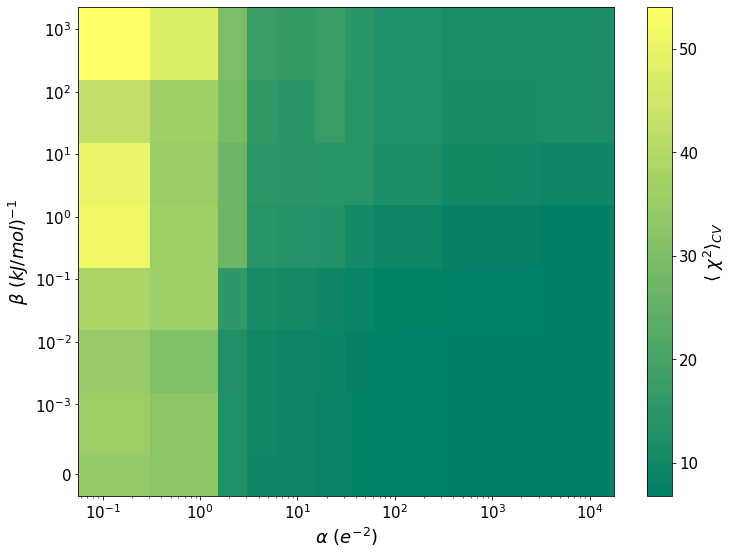

In [27]:
#Cross Validation 2d map

alp=[]
chi=[]
stdchi=[]
bet=[]
for j in range(len(CV3)):
    alp.append(CV3[j][0])
    bet.append(CV3[j][1])
    chi.append(CV3[j][3][0])
    stdchi.append(CV3[j][3][1])
    
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=(12,9))
ax = plt.axes()


# Data for three-dimensional scattered points
zdata = chi
xdata = alp
ydata = bet

ax.set_xlabel(r'$\alpha$ ($e^{-2}$)', fontsize=18)
ax.set_ylabel(r'$\beta$ $(kJ/mol)^{-1}$', fontsize=18)
ax.set_xscale('log')
ax.set_yscale('symlog', linthreshy=0.001)

ax.tick_params(axis='both', which='major', labelsize=15)


pnt3d=ax.scatter(xdata, ydata, c=zdata, marker='s', s=10000, cmap='summer');

cbar=plt.colorbar(pnt3d, aspect=20)
cbar.ax.tick_params(labelsize=15) 
cbar.set_label(r'$\langle$ $\chi ^2 \rangle _{CV}$', fontsize=18)


plt.show()

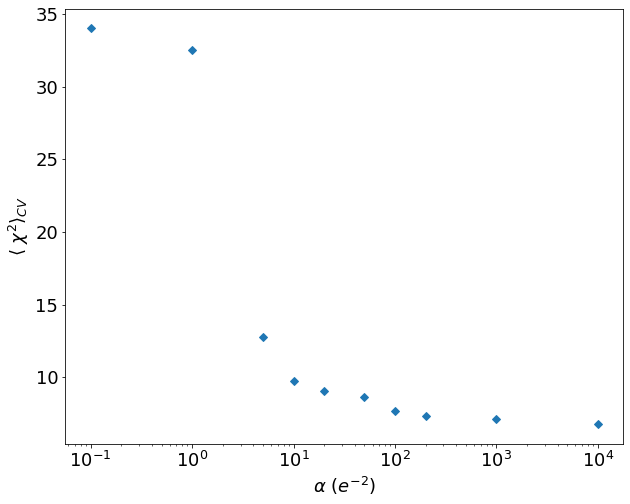

In [26]:
#Projecting chi square along Beta=0 axis

alp=[]
chi=[]
stdchi=[]
bet=[]
for j in range(len(CV3)):
    if CV3[j][1]==0:
        alp.append(CV3[j][0])
        chi.append(CV3[j][3][0])
        stdchi.append(CV3[j][3][1])
        
plt.figure(figsize=(10,8))
ax = plt.axes()

ydata = chi
xdata = alp

ax.set_xlabel(r'$\alpha$ ($e^{-2}$)', fontsize=18)
ax.set_ylabel(r'$\langle$ $\chi ^2 \rangle _{CV}$', fontsize=18)
ax.set_xscale('log')

ax.tick_params(axis='both', which='major', labelsize=18)

plt.plot(xdata, ydata, 'D')


plt.show()

In [29]:
#For Beta set 0, perform minimization for 14 different alpha values

lista=[]
lis_chis=[]
Kish=[]
Beta=0

for alpha in (0.1, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000):

      
        lambdas=scipy.optimize.minimize(func_and_grad_2met, x0=[0,0,0,0,0,0] , method='L-BFGS-B',jac=True)
        lista.append((alpha, lambdas.x))
        lis_chis.append((alpha,chis(lambdas.x)))
        Kish.append(Kish_size(lambdas.x)/Kish_size(np.zeros(6)))

Chi2: [8.462148345606535, 0.06855556038233483, 1.645604513927507, 0.001360233847085203, 0.07787630475788143, 0.01599589865553301, 0.015565809238875883, 0.8601667125198816, 3.6894469370108482, 0.6667235446052253]
Chi2: [8129.162279578272, 772.6958661100854, 1889.748591130546, 47.428325478130304, 202.80898973449519, 24.964548959698494, 2433.750037404569, 28.33710263304887, 117.74333261105349, 1376.180199876169]
Chi2: [0.21804703341722362, 18.625718587899126, 8.845468853586006, 7.273282363048796, 5.184484517432688, 1.938869352118659, 26.81404946233083, 1.2838723545656343, 14.622818826898149, 35.88120998117808]
Chi2: [6.308605102066634, 0.010934342803074208, 0.8889908766007881, 0.010563631941868728, 0.17866871241259447, 0.028898897152556426, 0.09553256362767967, 0.654465150852473, 2.8164447787024613, 1.5330494703338642]
Chi2: [3.510741230686236, 0.6928993925188265, 0.062454064840085394, 0.04979414619110079, 0.4060013480456884, 0.0031301510402873406, 0.1618636494810683, 0.051149529370615586

Chi2: [0.06433209067003662, 0.13320788676754725, 0.520529708933844, 0.10968541180839249, 0.3379697485336085, 0.06060156637876131, 0.012687119900524206, 0.6249158974644746, 0.4399255515398724, 0.6051149628427237]
Chi2: [0.05098560021482862, 0.0752328429101829, 0.49308528557712894, 0.1270671340297657, 0.3747930492231072, 0.05632091601250429, 2.573753552425171e-05, 0.7504300453938402, 0.31428861628931576, 0.5189718094231027]
Chi2: [0.30270614417622393, 0.031177516650892162, 0.0087844832613088, 0.03259510617601063, 0.6773389318075881, 0.08952562144760243, 0.03743258244778813, 0.9076635648678666, 0.21917466642244937, 0.657744641459515]
Chi2: [0.09318374428872554, 0.02802817826902227, 0.2245429579350031, 0.10013410956547344, 0.5020812520813082, 0.060209431216435176, 0.0141376811788331, 0.8809374878104056, 0.01839925818278792, 0.5325103374205404]
Chi2: [0.4613879313351347, 0.010937275896731187, 0.11999860591394884, 0.05277017260923174, 0.2686307340911049, 0.24012239399206953, 0.26732001809295

Chi2: [0.0002046537245096461, 0.024590735154392696, 0.07902239123409281, 0.12342485516367324, 0.029980613208975757, 0.0007977772572088373, 0.0940660860831552, 0.5419316128225913, 0.0027918630286682803, 0.779904482580665]
Chi2: [0.0002046537245160749, 0.024590735154351978, 0.07902239123416861, 0.12342485516367324, 0.029980613208975757, 0.0007977772572055734, 0.09406608608321033, 0.5419316128227033, 0.0027918630286522528, 0.7799044825804506]
Chi2: [0.0002046537245160749, 0.024590735154351978, 0.07902239123416861, 0.12342485516367324, 0.029980613208975757, 0.0007977772572055734, 0.09406608608321033, 0.5419316128227033, 0.0027918630286522528, 0.7799044825804506]
Chi2: [0.0002046537245129891, 0.024590735154372337, 0.07902239123412931, 0.12342485516367324, 0.029980613208975757, 0.000797777257207024, 0.09406608608318065, 0.5419316128226574, 0.0027918630286605634, 0.7799044825805698]
Chi2: [0.0002046537245160749, 0.024590735154351978, 0.07902239123416861, 0.12342485516367324, 0.029980613208975

Chi2: [0.002818199865144827, 0.3489796977306571, 0.2222852574970307, 0.0006011877076024263, 0.07684305916647045, 0.10849157283503998, 0.006184821561358848, 0.4446604221796499, 1.769825146915396, 1.3769369280813544]
Chi2: [0.0001223162942565786, 0.18431544097709732, 0.32125031067980103, 0.0006967476981839692, 0.06934821190110164, 0.16456200617504785, 0.2000266199870062, 0.35405965676876233, 1.0898484200510379, 1.4427058437437328]
Chi2: [0.004414382184149012, 0.08441147030402021, 0.2666020542693581, 0.0036785570621096437, 0.15809939259293856, 0.3631731203548569, 0.8348514585537015, 0.13737803062569143, 0.008480258343813434, 2.9674471578744117]
Chi2: [0.0003966161820154224, 0.1306994815708857, 0.3302425243732516, 0.001518796749099901, 0.0835159968814063, 0.2054172032930422, 0.31082281420276353, 0.34632772274622564, 0.7307791526060932, 1.5386098297995914]
Chi2: [0.022118198177744706, 0.08170237121460734, 0.2804943864138924, 0.0014682211234232463, 0.10771291405678024, 0.23349931440021676, 0

Chi2: [0.06541350871647302, 0.08384949527116158, 0.5521056040098894, 0.1087184225193042, 0.405440828370523, 0.03145697442243062, 0.005897472169109279, 0.61115244138694, 0.35521331834641856, 0.5665115059008301]
Chi2: [0.3484736468093117, 0.08713887517215987, 0.3046771981493786, 0.053826341271841244, 0.6092641486704585, 0.009209200790064464, 0.000419312334294705, 0.5138126422512411, 0.11253448564873914, 0.5886431097567288]
Chi2: [0.07588136401367235, 0.08208845127434405, 0.012870510043630065, 0.015348341705744166, 0.4032762427203714, 0.07237571348773326, 0.11190767825737195, 0.5539670238099803, 0.07884643051011056, 1.262642236539238]
Chi2: [0.17074159931914332, 0.09362363945849514, 0.10498217396574763, 0.03936840727265018, 0.5169871232041521, 0.038310788863815275, 0.029260530760572303, 0.5532666849531566, 0.07091000655336803, 0.8328837310401843]
Chi2: [0.4013216750636179, 0.03287649008888794, 3.695048897332638e-05, 0.009217678718668227, 0.4482522970827856, 0.022299887682587425, 0.0005592

Chi2: [0.04287331953452496, 9.44385566155762e-06, 0.038699147996292135, 0.0316380072573358, 0.4392137760195131, 0.017894698389311743, 0.0008537850512816195, 0.697608999590429, 0.047217326926984333, 0.5689964484042719]
Chi2: [0.042920861110233806, 1.2720624574044474e-06, 0.0390265052037861, 0.031127691954461165, 0.4386462641818577, 0.017834880226396656, 0.0009038010275502906, 0.6989482081452167, 0.04690607258315809, 0.5687139781042304]
Chi2: [0.042934706233582906, 1.0506654754932342e-06, 0.038976868408301356, 0.031234288176946557, 0.43856412627856417, 0.01786600179602739, 0.0008883058824474934, 0.6991553933792983, 0.04671169253976424, 0.5686692294941184]
Chi2: [0.04292163470346176, 1.2609397205996442e-06, 0.03902527188001131, 0.0311295110187587, 0.43864668930475714, 0.01783532467766743, 0.0009033342473127818, 0.6989528106640858, 0.046903346560080106, 0.5687147333612721]
Chi2: [0.042919626225615834, 1.2720705214198947e-06, 0.03902650380349014, 0.03112769193721393, 0.438648462175119, 0.01

Chi2: [0.042920861110233806, 1.2720624573819212e-06, 0.0390265052037861, 0.031127691954461165, 0.4386462641818577, 0.0178348802263978, 0.0009038010275502906, 0.6989482081452167, 0.04690607258315809, 0.5687139781042304]
Chi2: [0.042920861110233806, 1.2720624573819212e-06, 0.0390265052037861, 0.031127691954461165, 0.4386462641818577, 0.0178348802263978, 0.0009038010275502906, 0.6989482081452167, 0.04690607258315809, 0.5687139781042304]
Chi2: [0.04292086111012208, 1.272062457044025e-06, 0.039026505203845284, 0.031127691954461165, 0.4386462641818709, 0.017834880226414947, 0.0009038010275444708, 0.69894820814539, 0.04690607258324082, 0.5687139781040271]
Chi2: [0.04292086111012208, 1.272062457044025e-06, 0.039026505203845284, 0.031127691954461165, 0.4386462641818709, 0.017834880226414947, 0.0009038010275444708, 0.69894820814539, 0.04690607258324082, 0.5687139781040271]
Chi2: [8.462148345606535, 0.06855556038233483, 1.645604513927507, 0.001360233847085203, 0.07787630475788143, 0.0159958986555

Chi2: [0.00337695650014047, 0.0945797911508727, 0.2906151203597669, 0.0034487247586012042, 0.1285087611688114, 0.30417147419310964, 0.06059114029079439, 0.6801949790625436, 0.5299473565278491, 1.3772826184745124]
Chi2: [0.0009793061779105271, 0.07541521535550846, 0.36059841371864837, 0.006342660189197585, 0.14257966781238793, 0.3114771689616758, 0.06712318363160577, 0.6718811771603558, 0.505787016030855, 1.3388015344862518]
Chi2: [9.926882105153224e-08, 0.058003975979011996, 0.47183206078012174, 0.012258875651030503, 0.1512855838208632, 0.32949261168312266, 0.07643510983208501, 0.6621817833284642, 0.470298669998484, 1.261452981025099]
Chi2: [4.56151107756118e-07, 0.03092487227073193, 0.661203020056985, 0.03724915655669859, 0.16399089853641688, 0.3254929779158196, 0.0964783687890437, 0.6693596426764367, 0.38371540310533264, 1.1247603501577772]
Chi2: [0.007992648018080636, 0.01113535434038617, 0.9255453878381298, 0.12472563845428832, 0.1715042141507084, 0.23901051135069776, 0.09578335586

Chi2: [0.034903164211437826, 0.0006851487183024711, 0.03846414627517538, 0.02056549433674505, 0.4609182485185652, 0.009198100347050465, 0.0004318603905061518, 0.7168792390854847, 0.045348086776226544, 0.5728886110908993]
Chi2: [0.034904035412355386, 0.0006853053789347094, 0.03846383481849229, 0.020565331375329926, 0.46091417321937755, 0.009197914003778838, 0.0004318682461151762, 0.7168785732639877, 0.04534860754947943, 0.5728843422551936]
Chi2: [0.03490403569193963, 0.0006853054004976976, 0.03846383465834191, 0.02056533137371881, 0.4609141732196081, 0.009197913969185713, 0.0004318682580790286, 0.7168785727736241, 0.04534860734928911, 0.572884342825086]
Chi2: [0.034902483929367636, 0.0006852003218304679, 0.03846347734168381, 0.02056526869448392, 0.4609178142408818, 0.009198049137947802, 0.0004317633221641139, 0.7168788682174264, 0.04535068668381649, 0.5728889558883136]
Chi2: [0.034904035757204604, 0.0006853054055306824, 0.03846383462096108, 0.020565331373342877, 0.4609141732196623, 0.00

Chi2: [4.40105459065638, 0.34032515022830306, 0.1814731918151647, 0.02440261580354287, 0.25807114705088086, 0.0010584620045261525, 0.00011395365063347495, 0.11962506773444805, 1.0673182135931047, 3.6160864851727474]
Chi2: [4.323823572702446, 0.35281907669983226, 0.15755494394695405, 0.02215825976835261, 0.24176329438726665, 9.975533102456666e-06, 0.017419681439601726, 0.09803600121952122, 1.014513437543972, 3.639881488548601]
Chi2: [3.6222844913251633, 0.3777386135058045, 0.1077007810904933, 0.012196436786683074, 0.17378445760688735, 0.012226365877523957, 0.24157185769840617, 0.062295169799377055, 0.9233965893433551, 3.4985946128073104]
Chi2: [1.928903053840017, 0.387280382356516, 0.10620566190210023, 0.001892515296350425, 0.07492646137361482, 0.08343771221320508, 0.839548775460956, 0.03274688774437597, 0.808164396080373, 3.12723013913312]
Chi2: [0.402187389685657, 0.4091600775508683, 0.25308045762577236, 0.00012138080506389449, 0.03138323489806011, 0.15039931102104712, 1.0492675324900

Chi2: [0.051775408203280374, 0.0017367671822158144, 0.01477907902332012, 0.03098657917222345, 0.3771397470739863, 0.015091504847691567, 0.008093116689823503, 0.6852960375732651, 0.1552956580133196, 0.60625821104787]
Chi2: [0.03760200243034095, 0.00011880128626146759, 0.019415302752449105, 0.031111126126315114, 0.38586702436874826, 0.013203274969291967, 0.007617865718800199, 0.698658899247428, 0.06947773125249765, 0.6406423360406881]
Chi2: [0.029550471993949008, 0.0004919735299783016, 0.025809070217631472, 0.019794141948780323, 0.4312977310486337, 0.0059714431961997065, 0.003148057860820523, 0.7250521932533643, 0.0378944612032181, 0.6306566737127952]
Chi2: [0.00017297815452820727, 0.01320530702005616, 0.06689678426615549, 0.011182912373122519, 0.5004146316567056, 0.002537710815033179, 0.011718055037182325, 0.5874774673523746, 0.09958533170078938, 0.7355202377561002]
Chi2: [0.014064834479469088, 0.0025029154972200105, 0.03762070456342877, 0.016609825844843978, 0.4575229919139914, 0.00459

Chi2: [4.439890318626158, 0.33171145162629206, 0.18723464306139667, 0.023892259818129043, 0.25403601098040907, 0.0009806623667736865, 0.0006744901125815707, 0.1205776658744263, 1.0845935579955386, 3.5740384306860435]
Chi2: [4.378633878578661, 0.3408560449472912, 0.16336802447843055, 0.02121554895181624, 0.23432076082070827, 3.6629336823047202e-06, 0.027754229695800985, 0.0975533325957371, 1.0350761105025548, 3.5757243267644583]
Chi2: [3.8505127629313107, 0.3511632503407506, 0.1281053802152818, 0.012648517803591377, 0.17386556007001283, 0.009781473563793351, 0.23492027737751056, 0.06776512104728387, 0.9831984590182177, 3.3950057977765127]
Chi2: [2.379665437942834, 0.3441760364423875, 0.14244890846566377, 0.0027568254745468854, 0.08058159934456638, 0.06698448390701287, 0.7629887878935027, 0.044528627542677265, 0.9493971553005002, 2.943476573059154]
Chi2: [0.8149854392409098, 0.3392295114301678, 0.3277680724723049, 0.0004333767070167445, 0.033625105101733804, 0.12182963731251144, 0.944331

Chi2: [0.013869181808194945, 0.020156220102845644, 0.6816519149527839, 0.20325048969520815, 0.2567261799160391, 0.29467093798341853, 1.3783605759459148, 0.05596926896881291, 0.12857074379509661, 2.9556352600873956]
Chi2: [0.028284695981206386, 0.0231171665822985, 0.016990170552880077, 0.009707258566383221, 0.37990622611935576, 4.668138787979152e-06, 0.0050980374021022306, 0.9423000083788392, 0.015636255782577158, 0.7721391104716215]
Chi2: [0.005000668590690902, 0.0015178849179734335, 0.027659329567987966, 1.604987339864716e-06, 0.4808065184090619, 0.006351895814793324, 0.00039519528415746995, 0.9697641671583517, 0.013908217939922175, 0.6577440920134494]
Chi2: [0.02583976372014281, 0.03604944608310566, 0.050497273535980575, 0.013615886745163444, 0.5061348959910352, 0.031682361119705404, 1.2324312490575178e-06, 0.8187707828843955, 0.05064588474056935, 0.6928319985064004]
Chi2: [0.006425651924147962, 0.01868207019363759, 0.0508995441211033, 0.0035050632859715608, 0.5030874681219163, 0.013

Chi2: [0.013378194187821565, 0.02474337841985667, 0.04744451114237903, 0.0027970790648064016, 0.5043895783276974, 0.011743152683503637, 1.955157274540811e-05, 0.800335491605752, 0.07466434349261616, 0.6511525965755467]
Chi2: [0.01339350961171706, 0.024757396375770176, 0.04742154611675459, 0.0027956105392314655, 0.5043886721760903, 0.011745180722421223, 1.94002654109511e-05, 0.8003287677116154, 0.07466339888570282, 0.6511561247544646]
Chi2: [0.013393775869114657, 0.02475739671498325, 0.047421545656196315, 0.0027956915407089016, 0.5043886721767143, 0.011745180822697075, 1.940027191603086e-05, 0.8003297940891847, 0.07466237805542504, 0.6511513059172251]
Chi2: [0.013393775869110497, 0.02475739671498325, 0.047421545656196315, 0.0027956915407089016, 0.5043886721767143, 0.011745180822696145, 1.940027191603086e-05, 0.800329794089197, 0.07466237805542504, 0.6511513059172251]
Chi2: [0.013393350123907025, 0.024757717953185678, 0.04742210162901797, 0.0027955599378900434, 0.504387221452099, 0.01174

Chi2: [0.04481111567268359, 0.00015399156505213531, 0.022170782256747124, 0.02660675573602792, 0.3130429997138829, 0.006178625705219698, 0.014479283487365978, 0.8560856286072629, 0.5366007454794194, 0.6624232000541259]
Chi2: [0.023821182154181234, 0.0009069151246177804, 0.004225395146454696, 0.05362149174901975, 0.2674187152710061, 0.00046161133655946634, 0.003489520468092221, 1.0267324802723288, 0.20839884394931163, 0.7934782335809408]
Chi2: [0.0010437433060240232, 0.003141206612465649, 0.0003578911460597443, 0.059938733901852295, 0.2808453968078036, 0.011099618022611047, 0.0011519498114626367, 1.0519243889808363, 0.24460645735393105, 0.5541907284628496]
Chi2: [0.008809714856304818, 0.0018179439213858004, 0.000624909710931459, 0.056618692425011434, 0.2717512452787712, 0.0038476154993333706, 0.000230204808925791, 1.041390348027856, 0.2261847863999847, 0.6705427601841005]
Chi2: [0.01535255952478765, 0.0016667279105574144, 6.936781877563707e-09, 0.05217671493412954, 0.2751964324573606, 0

Chi2: [8.462148345606535, 0.06855556038233483, 1.645604513927507, 0.001360233847085203, 0.07787630475788143, 0.01599589865553301, 0.015565809238875883, 0.8601667125198816, 3.6894469370108482, 0.6667235446052253]
Chi2: [8129.162279578272, 772.6958661100854, 1889.748591130546, 47.428325478130304, 202.80898973449519, 24.964548959698494, 2433.750037404569, 28.33710263304887, 117.74333261105349, 1376.180199876169]
Chi2: [0.18957450657368752, 18.230206220843623, 8.66424636849198, 7.090458487008492, 5.092243662385363, 1.9048225315114267, 26.096587341835832, 1.2190018227091104, 14.242553832887408, 35.689205614807534]
Chi2: [6.546355097278507, 0.0034647438853979582, 0.970384662645065, 0.008936922361277255, 0.1637726098403185, 0.027852531308140915, 0.06424628354513175, 0.6791009881917658, 2.941087331643888, 1.4015003756394682]
Chi2: [4.514332210263311, 0.30882687660995245, 0.24405116636079127, 0.02816465016573136, 0.2876518672862928, 0.007763649905786242, 0.06083846017041235, 0.18372698474564222

Chi2: [0.05273833080436282, 0.34017396533394517, 0.15079516789149008, 0.0009959454951199028, 0.06672269446098421, 0.2104190840892727, 0.12626450267833314, 0.4575077077957119, 0.6300143892390919, 1.5887662391716255]
Chi2: [0.05273833080436282, 0.34017396533394517, 0.15079516789149008, 0.0009959454951199028, 0.06672269446098421, 0.2104190840892727, 0.12626450267833314, 0.4575077077957119, 0.6300143892390919, 1.5887662391716255]
Chi2: [0.052738330804197694, 0.3401739653341898, 0.1507951678913272, 0.0009959454951208482, 0.06672269446098421, 0.21041908408935514, 0.1262645026784363, 0.45750770779551553, 0.6300143892387352, 1.5887662391721011]
Chi2: [0.05273833080436282, 0.34017396533394517, 0.15079516789149008, 0.0009959454951199028, 0.06672269446098421, 0.2104190840892727, 0.12626450267833314, 0.4575077077957119, 0.6300143892390919, 1.5887662391716255]
Chi2: [0.05273833080436282, 0.34017396533394517, 0.15079516789149008, 0.0009959454951199028, 0.06672269446098421, 0.2104190840892727, 0.1262

Chi2: [4.0441562020494795, 0.2607009347758407, 0.33947941604571824, 0.011483069718241116, 0.12477983909699707, 0.011300342955328292, 0.33387354544881953, 0.08786977158310391, 1.5805080394303868, 2.4402736573659487]
Chi2: [3.7205212678782553, 0.2155587020694953, 0.41253924500943057, 0.00876287873427033, 0.1095687590329264, 0.011719124081579274, 0.26918093252208297, 0.12072358020295994, 1.6621985403623143, 2.288364642446234]
Chi2: [3.052884528071348, 0.18297489061084882, 0.5166701625753056, 0.007666630892352539, 0.11443974738659202, 0.004527749409445067, 0.05926974277209808, 0.20590326871196538, 1.817893484436326, 2.1530503416880995]
Chi2: [2.9781891239486638, 0.1618533304489273, 0.5501231926448704, 0.006591340755219496, 0.11065430909419016, 0.003937988443021529, 0.04070653161624468, 0.24229393696327653, 1.8877922948074037, 2.04587376921418]
Chi2: [2.206977679573247, 0.07401682106061046, 0.6957126223869594, 0.0008598128232241788, 0.08118565196910937, 0.007510052064864927, 0.0075702359927

Chi2: [0.12009313559561699, 0.4458020570846859, 0.1347316230071465, 0.00048076074810513535, 0.06912399506523305, 0.14935032868660922, 0.13861899521458035, 0.3227589978801444, 0.7223581617050173, 1.9192145331588972]
Chi2: [0.12009313757070395, 0.44579983908878923, 0.13473162417729426, 0.0004807607484798918, 0.06912399504712194, 0.14935022248202737, 0.13861899439069153, 0.32275899914615885, 0.7223556016470528, 1.9192145291412366]
Chi2: [0.12009313757070395, 0.44579983908878923, 0.13473162417729426, 0.0004807607484798918, 0.06912399504712194, 0.14935022248202737, 0.13861899439069153, 0.32275899914615885, 0.7223556016470528, 1.9192145291412366]
Chi2: [0.12009313658316045, 0.44579984016596014, 0.13473162359222404, 0.00048076074829267777, 0.06912399505618011, 0.14935032841920465, 0.1386189948026385, 0.3227589985131438, 0.7223581632568443, 1.9192145311501168]
Chi2: [0.12009313757070395, 0.44579983908878923, 0.13473162417729426, 0.0004807607484798918, 0.06912399504712194, 0.14935022248203067, 

Chi2: [0.12009230521839864, 0.44579983502150405, 0.13473162638646477, 0.000480760749187692, 0.06912399501293187, 0.14935022147232377, 0.1386189928352453, 0.32275900153634035, 0.7223556075066123, 1.919214521556127]
Chi2: [0.12009230521839864, 0.44579983502150405, 0.13473162638646477, 0.000480760749187692, 0.06912399501293187, 0.1493502214723271, 0.1386189928352453, 0.3227590015363325, 0.7223556075066123, 1.919214521556127]
Chi2: [0.12009230521839864, 0.44579983502150405, 0.13473162638646477, 0.000480760749187692, 0.06912399501293187, 0.1493502214723271, 0.1386189928352453, 0.3227590015363325, 0.7223556075066123, 1.919214521556127]
Chi2: [0.12009353926972961, 0.44580337178522517, 0.13473139219820773, 0.00048076074918604984, 0.06912399501298438, 0.14935011580407406, 0.13861899283751564, 0.32275900153284465, 0.7223587806928611, 1.9192137260881903]
Chi2: [0.12009230521839864, 0.44579983502150405, 0.13473162638646477, 0.000480760749187692, 0.06912399501293187, 0.1493502214723271, 0.138618992

Chi2: [0.24359100534863595, 0.533878456790276, 0.11896867279048126, 1.0903569954810201e-09, 0.07601144431883464, 0.11103977552832095, 0.18051427902171516, 0.21451083280712246, 0.7455283732316142, 2.2676523594218687]
Chi2: [0.24359100643351286, 0.5338784558835685, 0.11896867321336728, 1.0903567822941022e-09, 0.0760114443115275, 0.11103977535325334, 0.18051427866013334, 0.21451083320405806, 0.7455283744442687, 2.2676523577733265]
Chi2: [0.243577469175845, 0.5338947831083878, 0.11896093354018336, 1.099508671044735e-09, 0.07601325965339023, 0.1110404824138762, 0.18050912532598082, 0.21450747247102184, 0.7455205102907421, 2.267682883204789]
Chi2: [0.24359100682756188, 0.5338784555542374, 0.11896867336696364, 1.090356704636692e-09, 0.07601144430887334, 0.1110397752896606, 0.18051427852880822, 0.21451083334824106, 0.7455283748847471, 2.2676523571745655]
Chi2: [0.24359219797332976, 0.533878455224921, 0.11896867352054623, 1.0097164291684547e-09, 0.07601144430622471, 0.11103977522607923, 0.18051

Chi2: [0.4526522037312171, 0.6049855529493783, 0.0913281953306569, 0.0003948325658136922, 0.07778830861202626, 0.10083870806007457, 0.33785777163428843, 0.11352390084784503, 0.6588372668288364, 2.6821791457922135]
Chi2: [0.4972615885669997, 0.586440552092321, 0.09901498969957041, 0.00046071425511537016, 0.07963927388220184, 0.0940731488793076, 0.3154291836531401, 0.1209923356253141, 0.6924612816676767, 2.648404852940888]
Chi2: [0.5056409211345226, 0.5940704542772479, 0.0978602207754428, 0.0005332124291474836, 0.08021470461158454, 0.09319118835462975, 0.3257820976367846, 0.11538712849844478, 0.6909916272557834, 2.668616345001344]
Chi2: [0.49423803443128433, 0.5952756458239852, 0.10048784551975251, 0.0005580442652292762, 0.08097197782986454, 0.09163085953841635, 0.3114850113482536, 0.11824312619627544, 0.7039567746135594, 2.6517901645644026]
Chi2: [0.4962189188181287, 0.5949443088306291, 0.09933062597371005, 0.0005424491534854818, 0.08066247345705069, 0.09237315954593539, 0.3161046588602

Chi2: [0.49617046099125944, 0.5949718955377641, 0.09930624817464898, 0.0005425071048823424, 0.08067398787342782, 0.09236331439952146, 0.31616272432633896, 0.1174482895973946, 0.6985402085302106, 2.657540023247422]
Chi2: [0.49617046099125944, 0.5949718955377641, 0.09930624817464898, 0.0005425071048823424, 0.08067398787342782, 0.09236331439952146, 0.31616272432633896, 0.1174482895973946, 0.6985402085302106, 2.657540023247422]
Chi2: [0.49617046099125944, 0.5949718955377641, 0.09930624817464898, 0.0005425071048823424, 0.08067398787342782, 0.09236331439952146, 0.31616272432633896, 0.1174482895973946, 0.6985402085302106, 2.657540023247422]
Chi2: [0.49617046099125944, 0.5949718955377641, 0.09930624817464898, 0.0005425071048823424, 0.08067398787342782, 0.09236331439952146, 0.31616272432633896, 0.1174482895973946, 0.6985402085302106, 2.657540023247422]
Chi2: [8.462148345606535, 0.06855556038233483, 1.645604513927507, 0.001360233847085203, 0.07787630475788143, 0.01599589865553301, 0.015565809238

Chi2: [0.6967999828117153, 0.6107312208023725, 0.0849917911867163, 0.0010225477183397299, 0.08067801406932917, 0.09179503155716273, 0.4478790007625152, 0.07870424898711585, 0.6507748408990083, 2.8493742718800568]
Chi2: [0.6967999828117153, 0.6107312208023725, 0.0849917911867163, 0.0010225477183397299, 0.08067801406932917, 0.09179503155716273, 0.4478790007625152, 0.07870424898711585, 0.6507748408990083, 2.8493742718800568]
Chi2: [0.6967999828117153, 0.6107312208023725, 0.0849917911867163, 0.0010225477183397299, 0.08067801406932917, 0.09179503155716273, 0.4478790007625152, 0.07870424898711585, 0.6507748408990083, 2.8493742718800568]
Chi2: [0.6967999828117153, 0.6107312208023725, 0.0849917911867163, 0.0010225477183397299, 0.08067801406932917, 0.09179503155716273, 0.4478790007625152, 0.07870424898711585, 0.6507748408990083, 2.8493742718800568]
Chi2: [0.6967999828117153, 0.6107312208023725, 0.0849917911867163, 0.0010225477183397299, 0.08067801406932917, 0.09179503155716273, 0.44787900076251

Chi2: [0.8508920678345021, 0.6142938769927567, 0.07408715624689653, 0.0012546408892075115, 0.07979432365421404, 0.09476287879522427, 0.5553180387020342, 0.05983315649269594, 0.6140785546865557, 2.9585336681205634]
Chi2: [0.8508920678349663, 0.6142938769925064, 0.07408715624697264, 0.0012546408892075115, 0.07979432365421404, 0.09476287879519266, 0.5553180387019105, 0.059833156492736524, 0.6140785546868375, 2.9585336681201304]
Chi2: [0.8508920678347011, 0.6142938769926629, 0.07408715624692915, 0.0012546408892075115, 0.07979432365421404, 0.09476287879521374, 0.5553180387019725, 0.05983315649270947, 0.6140785546866614, 2.9585336681204395]
Chi2: [0.8508920678349663, 0.6142938769925064, 0.07408715624697264, 0.0012546408892075115, 0.07979432365421404, 0.09476287879519266, 0.5553180387019105, 0.059833156492736524, 0.6140785546868375, 2.9585336681201304]
Chi2: [0.8508920678348335, 0.6142938769926315, 0.07408715624694001, 0.0012546408892075115, 0.07979432365421404, 0.09476287879520846, 0.5553180

Chi2: [7.870915478072908, 0.02916466694679743, 1.435678627363806, 0.0028267001540333843, 0.09900776383343148, 0.019964886766198297, 0.00039655500928836374, 0.8073321114864737, 3.505258613370984, 0.8426812898681325]
Chi2: [8.298917578444991, 0.05631350190616929, 1.5876746943242104, 0.0017020514409888728, 0.08331998519376345, 0.01709140281606904, 0.009361945256105793, 0.845822695264782, 3.6425088498892926, 0.7116667178490566]
Chi2: [8.282059941811871, 0.05329988952740792, 1.5659495976308195, 0.001701774407930999, 0.08283228457368035, 0.01589597253183907, 0.012514737188523032, 0.8302404761274176, 3.6026183091267128, 0.7257291403648909]
Chi2: [8.161012270366284, 0.034611349446304895, 1.4196090488113902, 0.0016982337818141195, 0.07966233244827214, 0.00879615138746529, 0.045582756422896976, 0.7291165589332809, 3.3387954194608502, 0.8230130538589137]
Chi2: [8.153453835480013, 0.03416988892838065, 1.4164621961040305, 0.00169729532869651, 0.07957455759729244, 0.008647905004247376, 0.04646514569

Chi2: [0.967837479375332, 0.6173254553836705, 0.06528534714702909, 0.0013931871796964668, 0.07918598589387191, 0.09822204382722408, 0.6302906467995363, 0.04929737561194135, 0.5844301365272836, 3.034938706100126]
Chi2: [0.9717571912663054, 0.613661982814778, 0.06542375630845816, 0.0013389449369883835, 0.07871015768729064, 0.09868534626469423, 0.6433340825699114, 0.04901903831746877, 0.5836810500180168, 3.029885612617784]
Chi2: [0.9717573984616503, 0.6136601851243154, 0.06542376474558408, 0.001338910452106742, 0.07870920312252666, 0.0986854363815843, 0.6433349480829527, 0.0490184754181111, 0.5836832107567119, 3.029882673767344]
Chi2: [0.9717573984616503, 0.6136601851243154, 0.06542376474558408, 0.001338910452106742, 0.07870920312252666, 0.09868543638157891, 0.6433349480829527, 0.0490184754181111, 0.5836832107567119, 3.029882673767344]
Chi2: [0.9717573984616503, 0.6136601851243154, 0.06542376474558408, 0.001338910452106742, 0.07870920312252666, 0.09868543638157891, 0.6433349480829527, 0.0

Chi2: [1.0212167561567884, 0.6116998090565795, 0.062280300053350605, 0.0013471614111482796, 0.07822411598114215, 0.10038159918029374, 0.6778056557548362, 0.045710965429409486, 0.5721230429054446, 3.053591591012449]
Chi2: [1.0202892728715225, 0.6119953437461344, 0.06220897035797915, 0.001345927237117205, 0.0781924740041547, 0.10047922184193792, 0.6782646609885297, 0.045640391006207835, 0.5717601505011163, 3.053998921218604]
Chi2: [1.0193070237338406, 0.6123645798723254, 0.062122667763973405, 0.0013462327693868844, 0.07818833780865433, 0.10053939452648951, 0.6784285531311852, 0.04557753508486529, 0.5714555572927202, 3.054565071641664]
Chi2: [1.0192388104994878, 0.612483289676755, 0.06215167080143206, 0.0013490195053674871, 0.07820858967752756, 0.10049715073983884, 0.6781598285926951, 0.04556977798220885, 0.571674594789926, 3.054516206377037]
Chi2: [1.019129561749025, 0.6125100020091018, 0.06213251307137969, 0.001348407844501097, 0.07820526613648283, 0.10051253693735614, 0.678224795306879

In [30]:
x1=[]
x2=[]
x3=[]
x4=[]
x5=[]
x6=[]
x7=[]
x8=[]
x9=[]
x10=[]
summ=[]
for i in range(len(lis_chis)):
    x1.append(lis_chis[i][1][0])
    x2.append(lis_chis[i][1][1])
    x3.append(lis_chis[i][1][2])
    x4.append(lis_chis[i][1][3])
    x5.append(lis_chis[i][1][4])
    x6.append(lis_chis[i][1][5])
    x7.append(lis_chis[i][1][6])
    x8.append(lis_chis[i][1][7])
    x9.append(lis_chis[i][1][8])
    x10.append(lis_chis[i][1][9])    
    summ.append(np.average(lis_chis[i][1]))
    
Al=[]
q1=[]
q2=[]
q3=[]
q4=[]
q5=[]
q0=[]
tor=[]
for i in range(len(lista)):
    Al.append(lista[i][0])
    q1.append(lista[i][1][0])
    q2.append(lista[i][1][1])
    q3.append(lista[i][1][2])
    q4.append(lista[i][1][3])
    q5.append(lista[i][1][4])
    tor.append(lista[i][1][5])

q0=-np.array(q1)-np.array(q2)-np.array(q3)-np.array(q4)-3*np.array(q5) 

<Figure size 648x360 with 0 Axes>

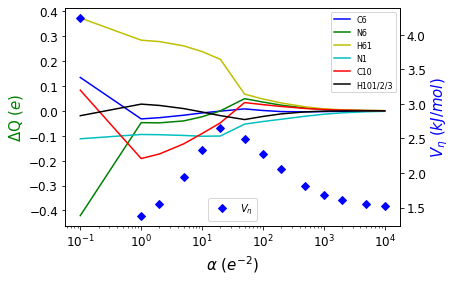

In [35]:
#plotting parameters values as a function of alpha

import matplotlib.pyplot as plt
import numpy as np
import pylab

plt.figure(figsize=(9, 5))



fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(Al, q0, color='b', label='C6')
ax1.plot(Al, q1, color='g', label='N6')
ax1.plot(Al, q2, color='y', label='H61')
ax1.plot(Al, q3, color='c', label='N1')
ax1.plot(Al, q4, color='r', label='C10')
ax1.plot(Al, q5, color='k', label='H101/2/3')

ax2.plot(Al, tor, 'D', color='b', label=r'$V_{\eta}$')
ax1.set_xscale('log')

ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

ax1.set_xlabel(r'$\alpha$ ($e^{-2}$)', fontsize  =15)
ax1.set_ylabel(r'$\Delta$Q ($e$)', color='g', fontsize  =15)
ax2.set_ylabel(r'$V_{\eta}$ ($kJ/mol$)', color='b', fontsize  =15)

ax1.legend(loc='upper right', fontsize=8)
ax2.legend(loc='lower center', fontsize=10)
plt.show()

<Figure size 1080x720 with 0 Axes>

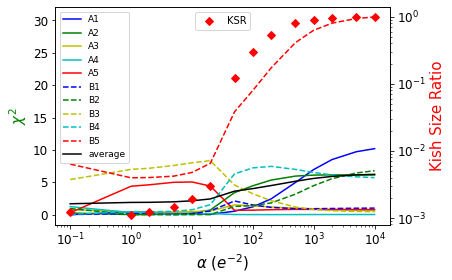

In [36]:
#plotting KSR and chi square values as a function of alpha


plt.figure(figsize=(15, 10))



fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(Al, x1, color='b', label='A1')
ax1.plot(Al, x2, color='g', label='A2')
ax1.plot(Al, x3, color='y', label='A3')
ax1.plot(Al, x4, color='c', label='A4')
ax1.plot(Al, x5, color='r', label='A5')
ax1.plot(Al, x6, '--', color='b', label='B1')
ax1.plot(Al, x7, '--', color='g', label='B2')
ax1.plot(Al, x8, '--', color='y', label='B3')
ax1.plot(Al, x9, '--', color='c', label='B4')
ax1.plot(Al, x10, '--', color='r', label='B5')
ax1.plot(Al, summ, color='k', label='average')

ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

ax2.plot(Al, Kish, 'D', color='r', label='KSR')
ax1.set_xscale('log')
ax2.set_yscale('log')

ax1.set_xlabel(r'$\alpha$ ($e^{-2}$)', fontsize  =15)
ax1.set_ylabel(r'$\chi ^2$', color='g', fontsize  =15)
ax2.set_ylabel('Kish Size Ratio', color='r', fontsize  =15)

ax1.legend(loc='upper left', fontsize=9)
ax2.legend(loc='upper center', fontsize=10)
plt.show()